In [1]:
#Imports for the ML project:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import random
import scipy as scipy

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits
import astropy
from astropy.stats import sigma_clipped_stats
from astropy.nddata import Cutout2D
from astropy import units as u
import imageio
from skimage.transform import resize

#Designate the .fits image file path:

import pathlib
data_dir = pathlib.Path('/home/sidius/Downloads/ImagesTEST/',untar =True)

In [2]:

# data_dir = pathlib.Path('/home/sidius/Downloads/ImagesTEST/',untar =True)
# image_count = len(list(data_dir.glob('*/*.fits')))
# print('Image count: ',image_count)

def clip(data,lim):
    print(data,lim)
    for k in range(0,data.shape[0]):
        for j in range(0,data.shape[1]):
            if data.data[k,j] < float(lim):
                data.data[k,j] = 0.0
    return data

def fits2jpg(fname,direcFrom,direcTo,numAugs):
    hdu_list = fits.open(direcFrom+'/'+fname)
    image = hdu_list[0].data
    print("original image size: ",image.shape)
    image = np.squeeze(image)
#     imageio.imwrite(direcTo+'/'+fname[0:-5]+'A.png', image.data)
    
    
    #Make 300 x 300 central cut out
    sigma = 3.0
    position = (image.shape[0]/2,image.shape[1]/2)
    size = u.Quantity((image.shape[0],image.shape[1]), u.pixel)
    img = Cutout2D(image,position,size)
    idx = np.isnan(img.data)
    img.data[idx] = 0.0
    
    
    AUG_Copy = Cutout2D(img.data,position,size)
    for i in range(0,numAugs):
        a = random.randint(1,3)
        print(a)
        
        if(i == 0):
            # Estimate stats
            mean, median, std = sigma_clipped_stats(AUG_Copy.data, sigma=sigma)
            AUG_Copy = clip(AUG_Copy,std*sigma)
            
#             imageio.imwrite(direcTo+'/'+fname[0:-5]+'B.png', AUG_Copy.data)
            
        if (a ==1):
            
            #Rotate image by the rand_int degrees
            AUG_Copy.data = scipy.ndimage.rotate(AUG_Copy.data,angle = a, mode = 'wrap',reshape = False)
            
            #Flip image data indices with rotation-flipping
            AUG_Copy.data = np.flipud(AUG_Copy.data)
        
        if (a == 2 or a == 3):        
            
            #Rotate image by the rand_int degrees
            AUG_Copy.data = scipy.ndimage.rotate(AUG_Copy.data,angle = a, mode = 'wrap',reshape = False)
            
            
#         AUG_Save = AUG_Copy
        #Crop out central 150x150 pixels
        position = (AUG_Copy.shape[0]/2,AUG_Copy.shape[1]/2)
        size = u.Quantity((150,150), u.pixel)
        AUG_Save = Cutout2D(AUG_Copy.data,position,size)
        
        print("Image size being saved: ",AUG_Save.data.shape)
    
        outfile = fname[0:-5] +'.png'
        imageio.imwrite(direcTo+'/'+fname[0:-5]+'B'+str(i)+'.png', AUG_Save.data)
        if (a ==1): #Flip back to increase augmentation efficiency
            AUG_Copy.data = np.flipud(AUG_Copy.data)
    

    return outfile

def fits2jpgVal(fname,direcFrom,direcTo,numAugs):
    hdu_list = fits.open(direcFrom+'/'+fname)
    image = hdu_list[0].data
#     print("original image size: ",image.shape)
    image = np.squeeze(image)
#     imageio.imwrite(direcTo+'/'+fname[0:-5]+'A.png', image.data)
    
    
    #Make 300 x 300 central cut out
    sigma = 3.0
    position = (image.shape[0]/2,image.shape[1]/2)
    size = u.Quantity((image.shape[0],image.shape[1]), u.pixel)
    img = Cutout2D(image,position,size)
    idx = np.isnan(img.data)
    img.data[idx] = 0.0
    
    
    AUG_Copy = Cutout2D(img.data,position,size)
    for i in range(0,1):
        a = random.randint(1,3)
#         print(a)
        
        if(i == 0):
            # Estimate stats
            mean, median, std = sigma_clipped_stats(AUG_Copy.data, sigma=sigma)
            AUG_Copy = clip(AUG_Copy,std*sigma)
            
#             imageio.imwrite(direcTo+'/'+fname[0:-5]+'B.png', AUG_Copy.data)
            
#         if (a ==1 or a ==2 or a==3):
            
#             #Rotate image by the rand_int degrees
#             AUG_Copy.data = scipy.ndimage.rotate(AUG_Copy.data,angle = a, mode = 'wrap',reshape = False)
            
#             #Flip image data indices with rotation-flipping
#             AUG_Copy.data = np.flipud(AUG_Copy.data)
        
#         if (a == 2 or a == 3):        
            
#             #Rotate image by the rand_int degrees
#             AUG_Copy.data = scipy.ndimage.rotate(AUG_Copy.data,angle = a, mode = 'wrap',reshape = False)
            
            
#         AUG_Save = AUG_Copy
        #Crop out central 150x150 pixels
        position = (AUG_Copy.shape[0]/2,AUG_Copy.shape[1]/2)
        size = u.Quantity((150,150), u.pixel)
        AUG_Save = Cutout2D(AUG_Copy.data,position,size)
        
#         print("Image size being saved: ",AUG_Save.data.shape)
    
        outfile = fname[0:-5] +'.png'
        imageio.imwrite(direcTo+'/'+fname[0:-5]+'B'+str(i)+'.png', AUG_Save.data)
        if (a ==1): #Flip back to increase augmentation efficiency
            AUG_Copy.data = np.flipud(AUG_Copy.data)
    

    return outfile


In [5]:
#borderless image creation

# List all files in a directory using os.listdir

#BENT TAIL IMAGES

basepath = 'ImagesTEST/Bent_Tail/Train'

for entry in os.listdir(basepath):
    if os.path.isfile(os.path.join(basepath, entry)):
        fits2jpg(entry,basepath,'ImagesTEST/png_Versions/Bent_Tail_png/Train',143)
        
basepath = 'NVSS_Downloads/NVSS_BT_VAL'

for entry in os.listdir(basepath):
    if os.path.isfile(os.path.join(basepath, entry)):
        fits2jpg(entry,basepath,'NVSS_Downloads/png_Versions/BT_NVSS_png/Val',143)
        
        

#FRI IMAGES

basepath = 'ImagesTEST/FIRST_FRI_fits/Train'

for entry in os.listdir(basepath):
    if os.path.isfile(os.path.join(basepath, entry)):
        fits2jpg(entry,basepath,'ImagesTEST/png_Versions/FRI_png/Train',288)
        
basepath = 'NVSS_Downloads/NVSS_FRI_VAL'

for entry in os.listdir(basepath):
    if os.path.isfile(os.path.join(basepath, entry)):
        fits2jpg(entry,basepath,'NVSS_Downloads/png_Versions/FRI_NVSS_png/Val',288)



# #FRII IMAGES

basepath = 'ImagesTEST/FIRST_FRII_fits/Train'

for entry in os.listdir(basepath):
    if os.path.isfile(os.path.join(basepath, entry)):
        fits2jpg(entry,basepath,'ImagesTEST/png_Versions/FRII_png/Train',144)

basepath = 'NVSS_Downloads/NVSS_FRII_VAL'

for entry in os.listdir(basepath):
    if os.path.isfile(os.path.join(basepath, entry)):
        fits2jpg(entry,basepath,'NVSS_Downloads/png_Versions/FRII_NVSS_png/Val',144)
        
# print(Names_List) #The image names are correctly read in as fits images


# Bent_Tails = list(data_dir.glob('png_Versions/Bent_Tail_png/*'))


# FRIs = list(data_dir.glob('png_Versions/FIRST_FRI_png/*'))


# FRIIs = list(data_dir.glob('png_Versions/FIRST_FRII_png/*'))


Lossy conversion from float32 to uint8. Range [-0.0003436750848777592, 0.34540238976478577]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000564328336622566, 0.34514206647872925]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005622836761176586, 0.34488168358802795]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000644988554995507, 0.3447251319885254]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006984455976635218, 0.34415194392204285]. Convert image to uint8 prior to saving to suppress this warning.


original image size:  (1, 1, 303, 303)
1
<astropy.nddata.utils.Cutout2D object at 0x7f3375f50be0> 0.0015215144958347082
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0006288419244810939, 0.34368255734443665]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00048667637747712433, 0.3428492248058319]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004595268110278994, 0.3425367772579193]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000494252482894808, 0.34149855375289917]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004589635645970702, 0.3411186635494232]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000521371082868427, 0.3403216302394867]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005039

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  

Lossy conversion from float32 to uint8. Range [-0.000519373279530555, 0.3423038423061371]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005301773780956864, 0.342286616563797]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005351497675292194, 0.3422572910785675]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000534319318830967, 0.342215895652771]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045475095976144075, 0.34202292561531067]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003657680645119399, 0.34172171354293823]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000351404

(150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0003176665341015905, 0.34360572695732117]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032851906144060194, 0.3438088297843933]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032907031709328294, 0.34399664402008057]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002735495218075812, 0.34446871280670166]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002936078526545316, 0.34480020403862]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029958909726701677, 0.3449416160583496]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0003000129945576191, 0.3411421775817871]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003065534692723304, 0.3410700857639313]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029387581162154675, 0.34130045771598816]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029326454387046397, 0.34192031621932983]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027208845131099224, 0.34243538975715637]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002890592732001096, 0.3427201509475708]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00028937586466781795, 0.3430005609989166]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029506534337997437, 0.342892587184906]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029063408146612346, 0.34277239441871643]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002614731201902032, 0.34249573945999146]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002605720655992627, 0.34199047088623047]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027779382071457803, 0.3417978286743164]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00029372857534326613, 0.34518128633499146]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002823534596245736, 0.3453182280063629]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002769768179859966, 0.345628559589386]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002667054068297148, 0.3456989526748657]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002608346985653043, 0.34575262665748596]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002550030476413667, 0.3457895815372467]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000256

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0003124169888906181, 0.34197795391082764]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003081756003666669, 0.34191611409187317]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002903191198129207, 0.3421592712402344]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031472434056922793, 0.34281229972839355]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031998721533454955, 0.3430064618587494]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002948451729025692, 0.3433564603328705]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0003026476188097149, 0.34428390860557556]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003080582246184349, 0.34422338008880615]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030034128576517105, 0.34415003657341003]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028170584118925035, 0.3439646065235138]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003000890137627721, 0.3438529968261719]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003053614927921444, 0.3437287211418152]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00029559305403381586, 0.3457231819629669]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030996734858490527, 0.34602785110473633]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029877701308578253, 0.3462633788585663]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030619214521721005, 0.34635573625564575]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003138681931886822, 0.3464307188987732]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002794530300889164, 0.3465478718280792]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)


Lossy conversion from float32 to uint8. Range [-0.00037365691969171166, 0.26343026757240295]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004177975933998823, 0.2611807882785797]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040686558349989355, 0.261900395154953]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045672518899664283, 0.2621749937534332]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005207638605497777, 0.2620909512042999]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005450539174489677, 0.2599959373474121]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00056

2
<astropy.nddata.utils.Cutout2D object at 0x7f3374248130> 0.00147398334229365
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0005536527023650706, 0.2613702416419983]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005563970771618187, 0.2599622905254364]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005445373826660216, 0.2619863450527191]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005417551146820188, 0.2623549997806549]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005376706831157207, 0.2619060277938843]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005325304809957743, 0.26062580943107605]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005264

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00043048153747804463, 0.2617216408252716]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004219513211864978, 0.2636147737503052]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040868736687116325, 0.2614595293998718]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004003617796115577, 0.26257550716400146]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039782279054634273, 0.2628222703933716]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003978791646659374, 0.26218196749687195]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0003490437811706215, 0.2631332576274872]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003342912532389164, 0.26003801822662354]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003356114320922643, 0.2603909969329834]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003501593309920281, 0.26108476519584656]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000332914903992787, 0.26244959235191345]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003306813014205545, 0.26179251074790955]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00031764968298375607, 0.26109856367111206]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003562950878404081, 0.26221591234207153]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003390083438716829, 0.25990352034568787]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003365837619639933, 0.26257601380348206]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033445359440520406, 0.26201313734054565]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032165442826226354, 0.26285606622695923]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0003643871459644288, 0.2603091895580292]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003647861012723297, 0.2621438801288605]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003510386450216174, 0.2630908489227295]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030322239035740495, 0.26228609681129456]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036891913623549044, 0.25791868567466736]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000327135028783232, 0.26297318935394287]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00034391816006973386, 0.2611304521560669]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033707841066643596, 0.2590368092060089]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036168223596177995, 0.25902536511421204]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037377161788754165, 0.26108720898628235]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037572564906440675, 0.26018765568733215]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003317414375487715, 0.26267844438552856]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0003575797309167683, 0.2609577178955078]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003619128547143191, 0.2622516453266144]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035618123365566134, 0.2607278823852539]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034256576327607036, 0.2608560025691986]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003179562627337873, 0.26023274660110474]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003023148456122726, 0.25896576046943665]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0003919221635442227, 0.26112598180770874]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000373844028217718, 0.26218900084495544]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003689664008561522, 0.2616285979747772]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038123183185234666, 0.2587154507637024]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039203057531267405, 0.26224368810653687]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003956272266805172, 0.2588699460029602]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00039694635779596865, 0.26174959540367126]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003481906314846128, 0.26067420840263367]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037796434480696917, 0.2588280439376831]. Convert image to uint8 prior to saving to suppress this warning.


2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
2
<astropy.nddata.utils.Cutout2D object at 0x7f33f42cf310> 0.0014520437107421458


Lossy conversion from float32 to uint8. Range [-0.0003557672898750752, 0.24351108074188232]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004268054326530546, 0.2435193508863449]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000518867454957217, 0.24347485601902008]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004904458182863891, 0.2434386909008026]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005054269568063319, 0.24333155155181885]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005469825700856745, 0.24317920207977295]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00057

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.000518489396199584, 0.24357689917087555]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005138893611729145, 0.24366417527198792]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005175811820663512, 0.2437453418970108]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005176346166990697, 0.2438899129629135]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005034368368797004, 0.2440604716539383]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000496362685225904, 0.24410371482372284]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004438

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00038978722295723855, 0.24356716871261597]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003823480801656842, 0.24346883594989777]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034467747900635004, 0.2431337982416153]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034123059595003724, 0.24287740886211395]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034304693690501153, 0.24273954331874847]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000342932267813012, 0.24259528517723083]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0003244610852561891, 0.2428855448961258]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000323126936564222, 0.2429547756910324]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003180581843480468, 0.24294984340667725]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031050018151290715, 0.2429039031267166]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003008359926752746, 0.24281662702560425]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032247178023681045, 0.24260811507701874]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0003291867033112794, 0.2437497228384018]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003220910730306059, 0.244021475315094]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003278708318248391, 0.2441723793745041]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003247761051170528, 0.24429845809936523]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032405415549874306, 0.2443520724773407]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003270812740083784, 0.2444402128458023]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003246

2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00030180721660144627, 0.24420441687107086]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031777643016539514, 0.24397185444831848]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003218690399080515, 0.24378414452075958]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032170384656637907, 0.24345403909683228]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031849744846113026, 0.24306680262088776]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032032711897045374, 0.2427777796983719]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00033540991717018187, 0.24273325502872467]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031150481663644314, 0.24290406703948975]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002947188913822174, 0.24294091761112213]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002940506674349308, 0.24298515915870667]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030062368023209274, 0.2429921180009842]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003234191390220076, 0.24295403063297272]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00031864061020314693, 0.24362006783485413]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031707619200460613, 0.24395504593849182]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032857124460861087, 0.24405497312545776]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000338551850290969, 0.24423594772815704]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003294138005003333, 0.24439187347888947]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003163325600326061, 0.24446046352386475]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00030811087344773114, 0.24451762437820435]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029968901071697474, 0.24445466697216034]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002918425598181784, 0.24430900812149048]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029702766914851964, 0.24422653019428253]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000295735226245597, 0.24413760006427765]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029070957680232823, 0.24394041299819946]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0003411770157981664, 0.24297942221164703]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003401791036594659, 0.24303734302520752]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032111056498251855, 0.24312275648117065]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030135203269310296, 0.24317458271980286]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003089218807872385, 0.2431713044643402]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002698587777558714, 0.8273577690124512]. Convert image to uint8 prior to saving to suppress this warning.


Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
1
<astropy.nddata.utils.Cutout2D object at 0x7f3374250b80> 0.0015163959469646215
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00045765895629301667, 0.8273914456367493]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005549397901631892, 0.827376663684845]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045154939289204776, 0.8270622491836548]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047889884444884956, 0.8266011476516724]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004925737157464027, 0.8255538940429688]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005151228979229927, 0.8251011371612549]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000547

1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0009343632264062762, 0.8149276971817017]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009560873149894178, 0.8153744339942932]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009737075306475163, 0.8157926797866821]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008801885414868593, 0.8168672919273376]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008791187428869307, 0.817168116569519]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008718889439478517, 0.8176229596138]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000795391853

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0005329265259206295, 0.817969799041748]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005188890499994159, 0.8172770142555237]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004823376948479563, 0.8148870468139648]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045900317491032183, 0.8132938742637634]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046900982852093875, 0.8127006888389587]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047261451254598796, 0.8132894039154053]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000452

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0004193338972982019, 0.8273636698722839]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041017011972144246, 0.828011155128479]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041343641350977123, 0.8282087445259094]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004005245864391327, 0.8282153010368347]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038698833668604493, 0.828028678894043]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003801152342930436, 0.8278636336326599]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003470

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0004962081438861787, 0.8136101365089417]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004774758708663285, 0.8149924278259277]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004538287175819278, 0.8161303400993347]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045557424891740084, 0.8170148730278015]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045091003994457424, 0.8172512054443359]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004585661517921835, 0.8174582719802856]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000483

1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00043175372411496937, 0.8163832426071167]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004461696953512728, 0.8159289956092834]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004573456244543195, 0.8146728873252869]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043749643373303115, 0.813676118850708]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004216761444695294, 0.8131303787231445]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042981625301763415, 0.8126968741416931]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000442

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00043111774721182883, 0.8265734314918518]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043592238216660917, 0.8264381885528564]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004361946485005319, 0.8262572288513184]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042437671800144017, 0.8257561326026917]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040509889367967844, 0.8246530294418335]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039539451245218515, 0.8241925835609436]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00047469104174524546, 0.817242443561554]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047029799316078424, 0.8177939057350159]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045342877274379134, 0.8180165886878967]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046514495625160635, 0.818083643913269]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004667381290346384, 0.8181098103523254]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000459612172562629, 0.8180578351020813]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004648

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00038810420664958656, 0.8184902667999268]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041635805973783135, 0.8205662965774536]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042569078505039215, 0.8217861652374268]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004187868908047676, 0.8228688836097717]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004135064664296806, 0.8238098621368408]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041257168049924076, 0.8246046900749207]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00030288402922451496, 0.21285706758499146]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004612285702023655, 0.21282373368740082]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000519778928719461, 0.21277768909931183]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005724421353079379, 0.21271903812885284]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039080745773389935, 0.21246856451034546]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040578338666819036, 0.21235999464988708]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

original image size:  (1, 1, 303, 303)
1
<astropy.nddata.utils.Cutout2D object at 0x7f33741987c0> 0.001422081986675039
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00031250700703822076, 0.2116381973028183]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000325248867738992, 0.21145859360694885]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033970861113630235, 0.21126775443553925]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034239108208566904, 0.21085309982299805]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003900488081853837, 0.2101508229970932]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039028399623930454, 0.2098759561777115]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00027747012791223824, 0.21180196106433868]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002656087453942746, 0.21166373789310455]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024209667753893882, 0.21149194240570068]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002343584201298654, 0.21128720045089722]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023884828260634094, 0.21105021238327026]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027117007994093, 0.2107817381620407]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0002644654887262732, 0.213140606880188]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002600703155621886, 0.21331679821014404]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026689699734561145, 0.2133844643831253]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002687167434487492, 0.21347741782665253]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002647502697072923, 0.21351277828216553]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002572222438175231, 0.21342667937278748]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00025731936329975724, 0.20947681367397308]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026543374406173825, 0.2099984586238861]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027514141402207315, 0.2103033810853958]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000270821969024837, 0.21069473028182983]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002609362709335983, 0.21080777049064636]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002811418380588293, 0.21100682020187378]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00022308281040750444, 0.2107536941766739]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024247908731922507, 0.21052053570747375]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025527726393193007, 0.21011234819889069]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002771625586319715, 0.20980308949947357]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002926914894487709, 0.21050047874450684]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002797903143800795, 0.21101586520671844]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00027061556465923786, 0.21319730579853058]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002654239651747048, 0.2130221128463745]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025698551326058805, 0.21293790638446808]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025708123575896025, 0.21260741353034973]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002728594990912825, 0.21232475340366364]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028026362997479737, 0.21180939674377441]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.000271848140982911, 0.21103334426879883]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029091621399857104, 0.21127624809741974]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002881254185922444, 0.21143625676631927]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028488290263339877, 0.21151989698410034]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028016004944220185, 0.2114180475473404]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027810430037789047, 0.2113439440727234]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0002567186893429607, 0.2095596045255661]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002759026538114995, 0.20955988764762878]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028874108102172613, 0.20985601842403412]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002957286196760833, 0.21014010906219482]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002867502626031637, 0.21091845631599426]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024721032241359353, 0.21158228814601898]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00026959541719406843, 0.21226662397384644]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002727505925577134, 0.2117716521024704]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030099236755631864, 0.21116845309734344]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003002537414431572, 0.21094435453414917]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002951724163722247, 0.21070893108844757]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027392341871745884, 0.21020472049713135]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
2
<astropy.nddata.utils.Cutout2D object at 0x7f337401a7c0> 0.0014462839462794363


Lossy conversion from float32 to uint8. Range [-0.0004879779589828104, 0.23458340764045715]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040009766235016286, 0.2342829704284668]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004000634653493762, 0.2341606467962265]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004510803846642375, 0.23388059437274933]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004258868284523487, 0.23355574905872345]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000432359694968909, 0.2333773672580719]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0003807467292062938, 0.23317770659923553]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039656797889620066, 0.23325762152671814]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003795527445618063, 0.2333872765302658]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038516405038535595, 0.2334780991077423]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003414185775909573, 0.23353032767772675]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033540118602104485, 0.23354241251945496]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00030652270652353764, 0.2318648099899292]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031404587207362056, 0.23210307955741882]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029914468177594244, 0.23239955306053162]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031191183370538056, 0.23268137872219086]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033138474100269377, 0.23319949209690094]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032845119130797684, 0.23343704640865326]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00029513516346924007, 0.23510704934597015]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000290918251266703, 0.2349667102098465]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028566885157488286, 0.23477435111999512]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002741270000115037, 0.2345312386751175]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000285882008029148, 0.2342386543750763]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031675075297243893, 0.23370946943759918]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0003058943257201463, 0.23222209513187408]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031883319024927914, 0.23262424767017365]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003194657911080867, 0.23273907601833344]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031505426159128547, 0.23284384608268738]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030118346330709755, 0.2330222874879837]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031844654586166143, 0.23309682309627533]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00028690326143987477, 0.2316332310438156]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027207753737457097, 0.2320028841495514]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002589972282294184, 0.2323130965232849]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002590480726212263, 0.23288899660110474]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026957382215186954, 0.23340612649917603]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027531449450179935, 0.2338637411594391]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0002793486346490681, 0.23243188858032227]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002674326824489981, 0.23186708986759186]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000280119595117867, 0.23093867301940918]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029892390011809766, 0.23099328577518463]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030342995887622237, 0.23118886351585388]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030408755992539227, 0.2313748598098755]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0002682285849004984, 0.23279257118701935]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002708811080083251, 0.23272132873535156]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026702918694354594, 0.2325499951839447]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025693417410366237, 0.23222270607948303]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025572816957719624, 0.2320958524942398]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026203898596577346, 0.23181498050689697]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00025816625566221774, 0.23493187129497528]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002587265335023403, 0.23511762917041779]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026771053671836853, 0.23516717553138733]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000267952709691599, 0.2351573407649994]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025425865896977484, 0.23503173887729645]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026376836467534304, 0.23477642238140106]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
1
<astropy.nddata.utils.Cutout2D object at 0x7f33f5b36730> 0.0014909004676155746


Lossy conversion from float32 to uint8. Range [-0.0003774508077185601, 0.12203190475702286]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045975728426128626, 0.12203092873096466]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004741759330499917, 0.12201008945703506]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003691389283630997, 0.1219320297241211]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045805511763319373, 0.12184888124465942]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036920272395946085, 0.12167985737323761]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00044086333946324885, 0.12158913165330887]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004086970293428749, 0.12174859642982483]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030912813963368535, 0.12186653167009354]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029102645930834115, 0.12194284796714783]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002941199636552483, 0.12197768688201904]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002939081459771842, 0.12197855114936829]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00026353431167081, 0.12171810120344162]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026894485927186906, 0.1218162402510643]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002516325330361724, 0.12198987603187561]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026934477500617504, 0.12219441682100296]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003032342647202313, 0.12233326584100723]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003030326624866575, 0.1223902478814125]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0002870624011848122, 0.12137136608362198]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002460335672367364, 0.12113653123378754]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030012850766070187, 0.12088099122047424]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026778317987918854, 0.12046021968126297]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002947453467641026, 0.12065182626247406]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023720036551821977, 0.12075123935937881]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0002863674599211663, 0.12175561487674713]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003175654564984143, 0.12170560657978058]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003077108121942729, 0.12161559611558914]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002773321175482124, 0.12148657441139221]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003010406799148768, 0.12131966650485992]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032110008760355413, 0.121188223361969]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00030261435313150287, 0.12213773280382156]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002916174998972565, 0.12221549451351166]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028371502412483096, 0.12223200500011444]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030610867543146014, 0.12222981452941895]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003011143417097628, 0.12222065031528473]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003067144425585866, 0.12218144536018372]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0002799499488901347, 0.12032889574766159]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003217559715267271, 0.12061305344104767]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003193018783349544, 0.12085777521133423]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030138183501549065, 0.12106222659349442]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028884928906336427, 0.12122581899166107]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002853242913261056, 0.12134819477796555]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00033632811391726136, 0.12094327062368393]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003076708235312253, 0.12087468802928925]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031458004377782345, 0.12080219388008118]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033469920163042843, 0.1207258403301239]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003139344335068017, 0.1206456795334816]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031514966394752264, 0.12071498483419418]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0002991636283695698, 0.12200930714607239]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031508589745499194, 0.12188749015331268]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033359182998538017, 0.12183365970849991]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003126292722299695, 0.12170643359422684]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032015464967116714, 0.12146803736686707]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003181893262080848, 0.12127857655286789]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 263)
2
<astropy.nddata.utils.Cutout2D object at 0x7f33f429b0d0> 0.0016427950467914343
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0004031578719150275, 0.07647202163934708]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038346421206369996, 0.07528935372829437]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038967959699220955, 0.07608355581760406]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038271734956651926, 0.07637664675712585]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034979352494701743, 0.07528340816497803]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003163364017382264, 0.07527386397123337]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00032517380896024406, 0.07588066905736923]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032878160709515214, 0.0761469230055809]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031335974927060306, 0.07513845711946487]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033191710826940835, 0.07593115419149399]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002695458533708006, 0.07537711411714554]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031434852280654013, 0.07616864889860153]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0002649419184308499, 0.07579144090414047]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028392052627168596, 0.07522768527269363]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025354258832521737, 0.07562346011400223]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002857186773326248, 0.07601014524698257]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026443530805408955, 0.074873186647892]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028620086959563196, 0.07599212974309921]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0009723633411340415, 0.07603240758180618]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011230765376240015, 0.07580149918794632]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013069952838122845, 0.0755741223692894]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012890403158962727, 0.07577488571405411]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001251228153705597, 0.07476627826690674]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0015868737827986479, 0.0750860944390297]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0018639668123796582, 0.0755392536520958]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0019411682151257992, 0.0759894996881485]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027862333809025586, 0.07544902712106705]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002771326689980924, 0.07504737377166748]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001997237326577306, 0.07571291923522949]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00176895537879318, 0.07543842494487762]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000277

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0005110662314109504, 0.07576387375593185]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005299139302223921, 0.07558700442314148]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00048144336324185133, 0.07500268518924713]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005613014218397439, 0.07484689354896545]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005974970408715308, 0.0751892477273941]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004528686695266515, 0.07547880709171295]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0012562534539029002, 0.07508965581655502]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000552451703697443, 0.07559159398078918]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011970691848546267, 0.07527674734592438]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010971555020660162, 0.0751870796084404]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034262551343999803, 0.07539933174848557]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003275028138887137, 0.07473278045654297]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
1


Lossy conversion from float32 to uint8. Range [-0.00042321710498072207, 1.9977819919586182]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009018250275403261, 1.9981426000595093]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010470838751643896, 1.9980522394180298]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010599097004160285, 1.9978303909301758]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010467245010659099, 1.9965242147445679]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011851009912788868, 1.9958471059799194]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013232

<astropy.nddata.utils.Cutout2D object at 0x7f3374248d30> 0.0016503097722306848
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00140383408870548, 1.9894264936447144]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001386027317494154, 1.9846739768981934]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001446545240469277, 1.982848882675171]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0015076658455654979, 1.9809097051620483]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0014985802117735147, 1.9791408777236938]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0015307276044040918, 1.982640266418457]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00151824147906

3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0009210118441842496, 2.0009846687316895]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001014387933537364, 2.0012354850769043]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010560984956100583, 2.000967502593994]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011327912798151374, 1.9999423027038574]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011012483155354857, 1.9994417428970337]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010057369945570827, 1.9974037408828735]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010392722

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0009369957842864096, 1.983670949935913]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009462287998758256, 1.985656499862671]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008892886689864099, 1.9909523725509644]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000717726128641516, 1.99393630027771]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005942147690802813, 1.9952642917633057]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005587913910858333, 1.9985591173171997]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006312099867

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0008566577453166246, 1.9898372888565063]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009192992583848536, 1.9862533807754517]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009432122460566461, 1.984300971031189]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000957903394009918, 1.9822386503219604]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009461105219088495, 1.9777759313583374]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009114317363128066, 1.9753875732421875]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009176552

2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.001064733020029962, 1.9957886934280396]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010400624014437199, 1.9963936805725098]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010414024582132697, 1.9962650537490845]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010133242467418313, 1.995397925376892]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010482566431164742, 1.9944137334823608]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001043824595399201, 1.993801236152649]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000908666639

3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0007015010342001915, 1.9881935119628906]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000729411724023521, 1.9895414113998413]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007656444213353097, 1.9907822608947754]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008317509200423956, 1.9929403066635132]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008724224753677845, 1.9953583478927612]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009084378834813833, 1.9967814683914185]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000905308

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0010948539711534977, 1.9722111225128174]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010381850879639387, 1.9751815795898438]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010496268514543772, 1.9795335531234741]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00098908762447536, 1.9832614660263062]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010120311053469777, 1.9843628406524658]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010881215566769242, 1.9853923320770264]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011334321

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0011590978829190135, 1.9820622205734253]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010941139189526439, 1.980783462524414]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010962496744468808, 1.9794285297393799]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011452257167547941, 1.9779977798461914]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001133549609221518, 1.973244071006775]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010856477310881019, 1.9715147018432617]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00110738223

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0014149283524602652, 1.9907132387161255]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003786729066632688, 0.3136400878429413]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005106191383674741, 0.31331667304039]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005481310654431581, 0.31312474608421326]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006164356018416584, 0.31241023540496826]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006045623449608684, 0.31182438135147095]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005169

Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 300)
3
<astropy.nddata.utils.Cutout2D object at 0x7f3375fc6a60> 0.0015276006306521595
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.000501982169225812, 0.31209465861320496]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004399048339109868, 0.312354177236557]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005305252852849662, 0.3124358355998993]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005471196491271257, 0.312447190284729]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005463060806505382, 0.3124372065067291]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004952443996444345, 0.3123486340045929]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004104210

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0003110917750746012, 0.3122589886188507]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032859304337762296, 0.3126232326030731]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030100898584350944, 0.3130795359611511]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028265122091397643, 0.3133222758769989]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029094202909618616, 0.3135124444961548]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002979820710606873, 0.3136472702026367]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0002667417866177857, 0.3137221336364746]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026248706853948534, 0.31369924545288086]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002608469221740961, 0.31365978717803955]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002767668047454208, 0.313436359167099]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002732103457674384, 0.3131963610649109]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027341427630744874, 0.3130476176738739]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00027878693072125316, 0.3126448392868042]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028939935145899653, 0.31259453296661377]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002835202612914145, 0.3124390244483948]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026791595155373216, 0.3123350143432617]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002905880974140018, 0.31190791726112366]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000287871080217883, 0.3117292523384094]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00027656438760459423, 0.3140144646167755]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026553613133728504, 0.31405943632125854]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002567971241660416, 0.3140568733215332]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027283094823360443, 0.3139423727989197]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024949846556410193, 0.3137730360031128]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025131841539405286, 0.31365934014320374]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00026539608370512724, 0.31358757615089417]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025185124832205474, 0.3131082057952881]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002541623543947935, 0.3124361038208008]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002604183100629598, 0.31187593936920166]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026296512805856764, 0.3115611672401428]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026210921350866556, 0.31166180968284607]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00025447108782827854, 0.31159481406211853]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002713289577513933, 0.3115793466567993]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026484872796572745, 0.3118473291397095]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025639269733801484, 0.3120640814304352]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026614786474965513, 0.3121519684791565]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026585094747133553, 0.31228068470954895]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0002525798336137086, 0.31325820088386536]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025757323601283133, 0.31301149725914]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025191347231157124, 0.31344839930534363]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025574929895810783, 0.3135673999786377]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002699370961636305, 0.3137638568878174]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002703126228880137, 0.31394973397254944]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
3
<astropy.nddata.utils.Cutout2D object at 0x7f3374248f40> 0.0014233588299248368


Lossy conversion from float32 to uint8. Range [-0.00035190919879823923, 0.10179194808006287]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041080103255808353, 0.10182755440473557]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041750603122636676, 0.10182403028011322]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004998427466489375, 0.10181446373462677]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005479240790009499, 0.10175718367099762]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043686010758392513, 0.10169657319784164]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0003072828403674066, 0.10057462006807327]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029672065284103155, 0.10063648968935013]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031012899125926197, 0.10067000240087509]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029703727341257036, 0.10067453980445862]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000274799793260172, 0.10067587345838547]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002185095800086856, 0.10066098719835281]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00021228595869615674, 0.10042417794466019]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021155316790100187, 0.10066479444503784]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021544039191212505, 0.10087495297193527]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022413469559978694, 0.10105390101671219]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00020821338694076985, 0.10120081156492233]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002296377788297832, 0.10124213248491287]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [

3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00022629270097240806, 0.10111331939697266]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002269507385790348, 0.1010572612285614]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022392311075236648, 0.10093178600072861]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022228214947972447, 0.10086230933666229]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022739081759937108, 0.10070972889661789]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002326872490812093, 0.10044635832309723]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00022100639762356877, 0.1006987914443016]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021560635650530457, 0.10066588222980499]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022414953855331987, 0.10062818974256516]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021939999714959413, 0.10057789832353592]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021607099915854633, 0.10047881305217743]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022267297026701272, 0.10035089403390884]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00021640208433382213, 0.10113215446472168]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022984475072007626, 0.10121386498212814]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021368125453591347, 0.10128102451562881]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00020824205421376973, 0.1013547033071518]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002244728966616094, 0.1013951525092125]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002152644592570141, 0.10140199959278107]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00022750531206838787, 0.10091489553451538]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002269164106110111, 0.10070996731519699]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021802933770231903, 0.10046777129173279]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021293821919243783, 0.1003785952925682]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022417503350879997, 0.10030180960893631]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002251475816592574, 0.10035574436187744]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00021789860329590738, 0.10081677883863449]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021768297301605344, 0.10081373900175095]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021867065515834838, 0.10078632831573486]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002311664866283536, 0.10075274854898453]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002267159870825708, 0.10067933052778244]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022876988805364817, 0.10064869374036789]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00022437336156144738, 0.10093822330236435]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021939494763500988, 0.10099834203720093]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002131928486051038, 0.10105463862419128]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002331439609406516, 0.10120087116956711]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002304301888216287, 0.10131310671567917]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022926644305698574, 0.10134290903806686]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00031976267928257585, 0.21751898527145386]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045205510105006397, 0.21738100051879883]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004139578086324036, 0.21713055670261383]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004558078362606466, 0.21690325438976288]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047313535469584167, 0.21677201986312866]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004841200716327876, 0.21662865579128265]. Convert image to uint8 prior to saving to suppress this warning.


original image size:  (1, 1, 303, 303)
2
<astropy.nddata.utils.Cutout2D object at 0x7f33742505e0> 0.0012464667088352144
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0004609579045791179, 0.21612219512462616]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004586123686749488, 0.21593144536018372]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043918838491663337, 0.21601925790309906]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039201861363835633, 0.2159595936536789]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036519166314974427, 0.21579131484031677]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035190233029425144, 0.2156694382429123]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00029075119527988136, 0.21662594377994537]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026870673173107207, 0.21646235883235931]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002732398279476911, 0.21636459231376648]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027041250723414123, 0.21594420075416565]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028408694197423756, 0.2155594527721405]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000287507165921852, 0.21533642709255219]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.000330259877955541, 0.21619734168052673]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003403691225685179, 0.21645773947238922]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003417239058762789, 0.21657058596611023]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003404884191695601, 0.21676132082939148]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032717478461563587, 0.2169581949710846]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003509002272039652, 0.2170453518629074]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00039289789856411517, 0.21550509333610535]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000376010371837765, 0.21499298512935638]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034514296567067504, 0.21465568244457245]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003676367923617363, 0.21493776142597198]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038224394666031003, 0.21566642820835114]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003816442040260881, 0.21587295830249786]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00036915569216944277, 0.2142990082502365]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039697220199741423, 0.21501673758029938]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000388722779462114, 0.21538478136062622]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038934865733608603, 0.21553100645542145]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003961722832173109, 0.21581466495990753]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037761335261166096, 0.21586328744888306]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0003925452765543014, 0.21695742011070251]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003816771786659956, 0.2167239636182785]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003892234817612916, 0.2166207730770111]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003967316006310284, 0.21650515496730804]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040092269773595035, 0.21637719869613647]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004015887971036136, 0.2160850614309311]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0004239551199134439, 0.21676889061927795]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004268308402970433, 0.21684987843036652]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041126637370325625, 0.2169460654258728]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003667337296064943, 0.21692508459091187]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034106403472833335, 0.21670587360858917]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003315526992082596, 0.2164505124092102]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0004338405269663781, 0.21565312147140503]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004551142337732017, 0.2159423530101776]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004443853977136314, 0.21600544452667236]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041243634768761694, 0.21596325933933258]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003941498580388725, 0.21590282022953033]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039167943759821355, 0.21606020629405975]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00045484438305720687, 0.21696928143501282]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043991219718009233, 0.21672390401363373]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004312540986575186, 0.21661639213562012]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045971007784828544, 0.21622031927108765]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004523304523900151, 0.2157139927148819]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004273152444511652, 0.21586890518665314]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
original image size:  (1, 1, 253, 303)
3
<astropy.nddata.utils.Cutout2D object at 0x7f3372907fd0> 0.0015474355313926935


Lossy conversion from float32 to uint8. Range [-0.0004050089337397367, 0.006015455350279808]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043093040585517883, 0.004553673323243856]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004147730069234967, 0.0037671534810215235]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041469192365184426, 0.003346517914906144]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004728345957119018, 1.0502134561538696]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004054994788020849, 0.0032310073729604483]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Rang

Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
2
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
2
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
2
Image size being saved:  (139, 150)
2
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
2
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
2
Image size being saved:  (139, 150)
2
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)


Lossy conversion from float32 to uint8. Range [-0.000535783008672297, 1.0413169860839844]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005011967150494456, 1.0524168014526367]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045152215170674026, 1.0451565980911255]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005219151498749852, 1.0535756349563599]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005743203219026327, 1.0503185987472534]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046637305058538914, 1.0560059547424316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005889

1
Image size being saved:  (139, 150)
2
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
2
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
2
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
2
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
2
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)


Lossy conversion from float32 to uint8. Range [-0.0006165935192257166, 1.0470439195632935]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005996563704684377, 1.0546894073486328]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005715898587368429, 1.0549604892730713]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005950245540589094, 1.0490128993988037]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006358323735184968, 1.0500797033309937]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006078550941310823, 1.0466110706329346]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00057717

2
Image size being saved:  (139, 150)
2
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
2
Image size being saved:  (139, 150)
2
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
2
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
2
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
2
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0006410818896256387, 1.0526293516159058]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006420421996153891, 1.0542680025100708]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006682818057015538, 1.0440946817398071]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007189520401880145, 1.0517984628677368]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006527015939354897, 1.0493683815002441]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007051154971122742, 1.0539617538452148]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00070718

Image size being saved:  (139, 150)
2
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
2
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
2
Image size being saved:  (139, 150)
2
Image size being saved:  (139, 150)
2
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
2
Image size being saved:  (139, 150)
2
Image size being saved:  (139, 150)
2
Image size being saved:  (139, 150)
2
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
2
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)


Lossy conversion from float32 to uint8. Range [-0.0007257009274326265, 0.013931253924965858]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007209411705844104, 1.0500552654266357]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006633931770920753, 0.024583004415035248]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007060028146952391, 1.0471042394638062]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007014175062067807, 0.05056162178516388]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007379369926638901, 0.06496284157037735]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

1
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
2
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
2
Image size being saved:  (139, 150)
2
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
2
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
2
Image size being saved:  (139, 150)
2
Image size being saved:  (139, 150)
2
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
2
Image size being saved:  (139, 150)


Lossy conversion from float32 to uint8. Range [-0.0007853924762457609, 0.7286013960838318]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007352826651185751, 0.5561411380767822]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000714873312972486, 0.40499138832092285]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007231226773001254, 0.23274937272071838]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006583425565622747, 0.1892857402563095]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007287449552677572, 0.12370601296424866]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000668

1
Image size being saved:  (139, 150)
2
Image size being saved:  (139, 150)
2
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
2
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
2
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
2
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
2
Image size being saved:  (139, 150)
2
Image size being saved:  (139, 150)
2
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
3
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0007374106789939106, 0.013863172382116318]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007272576331160963, 0.017586467787623405]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008119527483358979, 0.017687469720840454]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008899054955691099, 0.013783643022179604]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008594330283813179, 0.016582585871219635]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006411231006495655, 0.8987551927566528]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
1
Image size being saved:  (139, 150)
2
Image size being saved:  (139, 150)
2
Image size being saved:  (139, 150)
original image size:  (1, 1, 303, 303)
3
<astropy.nddata.utils.Cutout2D object at 0x7f337401aaf0> 0.0015025916509330273
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0005294089787639678, 0.8931823968887329]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006329727475531399, 0.8923856019973755]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007040323689579964, 0.8915546536445618]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000714862544555217, 0.8888540267944336]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007003749487921596, 0.8882856369018555]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007071415311656892, 0.8905068039894104]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000719157

3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00042300671339035034, 0.8967987298965454]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003825000021606684, 0.8965185880661011]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034891022369265556, 0.8958439826965332]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003719753585755825, 0.895232081413269]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003930800885427743, 0.8948784470558167]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040274957427755, 0.8936240673065186]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000436438

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0005681163747794926, 0.9026612043380737]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000517588690854609, 0.9027634263038635]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005141373258084059, 0.902417004108429]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004978050710633397, 0.9016397595405579]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004884853260591626, 0.9004502296447754]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005341257783584297, 0.899439811706543]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00056196615

1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0006595823797397316, 0.8879107236862183]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006552489358000457, 0.8868175745010376]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00060522451531142, 0.8883090019226074]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005601946031674743, 0.88904869556427]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005782716325484216, 0.889751136302948]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000599641993176192, 0.8904162049293518]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00062406930373

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0004661595157813281, 0.8958945274353027]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004094169707968831, 0.8958162665367126]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043217919301241636, 0.8953624367713928]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004533047031145543, 0.8951440453529358]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005069567705504596, 0.8942780494689941]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005144825554452837, 0.8935359716415405]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005054

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.000506806478369981, 0.9011468291282654]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046794183435849845, 0.901889443397522]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047065739636309445, 0.9025864005088806]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005103087751194835, 0.9027841091156006]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005475294892676175, 0.9026787877082825]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000540433160495013, 0.9023532271385193]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000525785

2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.000521137728355825, 0.8868836164474487]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005719030159525573, 0.8889674544334412]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005789540009573102, 0.8895909190177917]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000569754047319293, 0.8907253742218018]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005511793424375355, 0.891238272190094]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005215592682361603, 0.8917141556739807]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00051293516

3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.000550552096683532, 0.8912019729614258]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005485127912834287, 0.8896316885948181]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005425965646281838, 0.8877776265144348]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000541150220669806, 0.8897650241851807]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005286211962811649, 0.8908848166465759]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005357774207368493, 0.8919523358345032]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005470298

3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0004918290069326758, 0.9019522666931152]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005076783709228039, 0.9018681645393372]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005255980067886412, 0.9017478227615356]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005423882976174355, 0.9015753865242004]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005569327040575445, 0.9013512134552002]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005747709074057639, 0.9003697633743286]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00055506

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
3
<astropy.nddata.utils.Cutout2D object at 0x7f33f5b36c70> 0.0016771905357018113


Lossy conversion from float32 to uint8. Range [-0.0009219766943715513, 1.3310333490371704]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009054300608113408, 1.3294105529785156]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006136890151537955, 1.3279608488082886]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007199188112281263, 1.3252179622650146]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009056171984411776, 1.3230115175247192]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009441996226087213, 1.3217943906784058]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00093453

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0008733891299925745, 1.3234143257141113]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008674755808897316, 1.3243101835250854]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009426395990885794, 1.3263671398162842]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009093755506910384, 1.3271913528442383]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009181612986139953, 1.3275489807128906]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009564677020534873, 1.3274198770523071]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00089561

2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0009161597117781639, 1.3241363763809204]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000974783324636519, 1.3258771896362305]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009336434886790812, 1.3274383544921875]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008999300189316273, 1.3288084268569946]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009633365552872419, 1.3294200897216797]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010598187800496817, 1.3304823637008667]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000990904

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0011351251741871238, 1.3263977766036987]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011564341839402914, 1.3232202529907227]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011715623550117016, 1.322008490562439]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011540621053427458, 1.3193508386611938]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011429210426285863, 1.3163834810256958]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001109882490709424, 1.3147846460342407]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010567415

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0011680847965180874, 1.320041298866272]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00111372338142246, 1.3228563070297241]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010709499474614859, 1.3236130475997925]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011840465012937784, 1.3252853155136108]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010917172767221928, 1.326003909111023]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010378347942605615, 1.3260220289230347]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001160137588

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0012923430185765028, 1.3300225734710693]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00130463729146868, 1.3306294679641724]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013185039861127734, 1.331185221672058]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011709948303177953, 1.332519769668579]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011440603993833065, 1.3328578472137451]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012791815679520369, 1.3335084915161133]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001341439783

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.001302263350225985, 1.3170747756958008]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012703356333076954, 1.3183296918869019]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012622959911823273, 1.3186724185943604]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013181318063288927, 1.3192391395568848]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013325025793164968, 1.319785714149475]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012712401803582907, 1.3198857307434082]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013827173

3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0014086334267631173, 1.3187130689620972]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0015209931880235672, 1.3221700191497803]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0015436206012964249, 1.3242889642715454]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0015319394879043102, 1.325290560722351]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001449804985895753, 1.3280225992202759]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001516843563877046, 1.3296241760253906]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00153808610

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.001499988604336977, 1.3296048641204834]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001458494458347559, 1.3277095556259155]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0014460970414802432, 1.3266513347625732]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0015073554823175073, 1.3230061531066895]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001517035416327417, 1.320197582244873]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0015083717880770564, 1.3156015872955322]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001525415922

3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
1
<astropy.nddata.utils.Cutout2D object at 0x7f33f5b36af0> 0.001620908675249666


Lossy conversion from float32 to uint8. Range [-0.00042182535980828106, 1.9173790216445923]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010193742346018553, 1.9166414737701416]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012329495511949062, 1.9155406951904297]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012836590176448226, 1.914862036705017]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012313287006691098, 1.9132294654846191]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011992993531748652, 1.9101167917251587]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00140205

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0012566293589770794, 1.9123706817626953]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011383024975657463, 1.9140419960021973]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010839079041033983, 1.9144530296325684]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010240438859909773, 1.9150402545928955]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010402643820270896, 1.9152230024337769]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010472763096913695, 1.9153302907943726]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00101344

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0009107241057790816, 1.9022533893585205]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009097600122913718, 1.899444580078125]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008800018113106489, 1.8996526002883911]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009213554440066218, 1.905626893043518]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009056452545337379, 1.9105535745620728]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000860328902490437, 1.91326904296875]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008296858286

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0008926175069063902, 1.9143435955047607]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009226747206412256, 1.9120500087738037]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009481876040808856, 1.9093984365463257]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009319285163655877, 1.9047635793685913]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000893857388291508, 1.901259422302246]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008951150230132043, 1.89742910861969]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000949389417

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0010166032006964087, 1.9126687049865723]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009968969970941544, 1.912581443786621]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009912779787555337, 1.912406086921692]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009805423906072974, 1.9121555089950562]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009433689992874861, 1.9114258289337158]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008919617976062, 1.9104015827178955]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009283576509

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0008078737882897258, 1.9133456945419312]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007816588622517884, 1.9145029783248901]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007555334595963359, 1.9164605140686035]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007745182956568897, 1.9185192584991455]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000777196662966162, 1.919327974319458]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00076332624303177, 1.9196858406066895]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000749764789

1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0008919325773604214, 1.8962732553482056]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00085583480540663, 1.8919175863265991]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008543918374925852, 1.8896188735961914]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008517604437656701, 1.8902326822280884]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008856485947035253, 1.8934868574142456]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008751228451728821, 1.8977997303009033]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008811331

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0009593324502930045, 1.9086006879806519]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009835796663537621, 1.9073761701583862]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009739244705997407, 1.905487060546875]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009651137515902519, 1.9047160148620605]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008923021960072219, 1.9019643068313599]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009277823846787214, 1.8985850811004639]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000931285

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0009238497004844248, 1.9170302152633667]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009447774500586092, 1.9174696207046509]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009532630792818964, 1.917203664779663]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009623240912333131, 1.9169057607650757]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009513649856671691, 1.9153472185134888]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000953264010604471, 1.913774847984314]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00100971758

3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
2
<astropy.nddata.utils.Cutout2D object at 0x7f33f5b36af0> 0.0012726721179205924


Lossy conversion from float32 to uint8. Range [-0.0003144892689306289, 0.39601069688796997]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032927357824519277, 0.3951597213745117]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003167206887155771, 0.39649662375450134]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027824900462292135, 0.39886045455932617]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031691850745119154, 0.3969910442829132]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004371320828795433, 0.40083596110343933]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00026975208311341703, 0.3995617628097534]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028618634678423405, 0.3952726125717163]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002746871905401349, 0.394305557012558]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002523951116017997, 0.39564335346221924]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002630384115036577, 0.3977982997894287]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000271151919150725, 0.39964747428894043]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000255

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0001972266036318615, 0.39177677035331726]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00019716501992661506, 0.3959667980670929]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00020206801127642393, 0.39293456077575684]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00020821196085307747, 0.3954242169857025]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00020555254013743252, 0.39581289887428284]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002129000349668786, 0.39413487911224365]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0002122863515978679, 0.39622750878334045]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022535382595378906, 0.39670899510383606]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022464180074166507, 0.3939515948295593]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00020425065304152668, 0.39316511154174805]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00019617909856606275, 0.3937736451625824]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0001874735753517598, 0.3960117697715759]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00021789729362353683, 0.39260414242744446]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002093668736051768, 0.39319899678230286]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022624553821515292, 0.3961234390735626]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021170848049223423, 0.39485231041908264]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00020112917991355062, 0.39319461584091187]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023159448755905032, 0.3973560929298401]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00023476153728552163, 0.395144522190094]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021187777747400105, 0.39102134108543396]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002190577652072534, 0.3944608271121979]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021136221766937524, 0.3916715085506439]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002116845134878531, 0.3900492191314697]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002242060872958973, 0.3947591483592987]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0002191830863012001, 0.39160311222076416]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002322082727914676, 0.395915687084198]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022382619499694556, 0.3962424099445343]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000238127657212317, 0.3927881419658661]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023454503389075398, 0.39208197593688965]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002167097118217498, 0.3942326307296753]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000215

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00022355536930263042, 0.39100411534309387]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024691494763828814, 0.3933012783527374]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022526724205818027, 0.39086392521858215]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022834881383460015, 0.3936995565891266]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024810066679492593, 0.3934096395969391]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023572257487103343, 0.39208823442459106]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.000240870111156255, 0.3933393657207489]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023970715119503438, 0.39349257946014404]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023737573064863682, 0.3941335082054138]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024367717560380697, 0.3915283679962158]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004298393614590168, 0.8786485195159912]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005814401665702462, 0.8789491057395935]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00051

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
2
<astropy.nddata.utils.Cutout2D object at 0x7f337401a7c0> 0.0016663710703141987
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0006352674099616706, 0.8789680600166321]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005833532195538282, 0.8784652948379517]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005987452459521592, 0.8782061338424683]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006308371084742248, 0.8779031038284302]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007835493888705969, 0.876742422580719]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007633000495843589, 0.876263439655304]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006722502

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0008742503705434501, 0.8694286942481995]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009178463369607925, 0.8696279525756836]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009443474700674415, 0.8697983026504517]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000890542462002486, 0.8701285123825073]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008436859352514148, 0.8701896667480469]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008454793132841587, 0.8701508641242981]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000820862

1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0005582840531133115, 0.8649790287017822]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005082620191387832, 0.8678022027015686]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004959277575835586, 0.868683934211731]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046516131260432303, 0.8703583478927612]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005169637151993811, 0.8711487054824829]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005855115596204996, 0.873327374458313]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000573249

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0005587274208664894, 0.8788090348243713]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005883505800738931, 0.8785499930381775]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005897514056414366, 0.8774957656860352]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000613513751886785, 0.8760374784469604]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006328102899715304, 0.8754646182060242]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006195140304043889, 0.8741797208786011]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000616306

1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0005564425955526531, 0.8695830702781677]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006143348873592913, 0.8695529103279114]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006000202847644687, 0.8694043755531311]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000564496498554945, 0.8689558506011963]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005571144865825772, 0.8687458038330078]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005438851658254862, 0.8685051798820496]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000529686

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0006814295775257051, 0.8740589618682861]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000646867963951081, 0.8745511770248413]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000636603101156652, 0.8754373788833618]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006232369923964143, 0.8765103816986084]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005989199271425605, 0.8767966628074646]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006462857127189636, 0.8772600293159485]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006950435

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0006663404637947679, 0.8701778650283813]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006904508918523788, 0.8693435192108154]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006736748619005084, 0.8665675520896912]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006451083463616669, 0.8655559420585632]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006931179668754339, 0.8664650917053223]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006585973897017539, 0.8671965599060059]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00066601

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0006401051650755107, 0.8669992685317993]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00072108005406335, 0.8657196164131165]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006771479384042323, 0.8641671538352966]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006518162554129958, 0.8645105361938477]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006585502997040749, 0.8653470873832703]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007022682693786919, 0.8677072525024414]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006818366

3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0006732092588208616, 0.8771460056304932]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002994334790855646, 1.8523664474487305]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000648537534289062, 1.85219144821167]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007066474645398557, 1.8520331382751465]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008842060342431068, 1.8515392541885376]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012928335927426815, 1.850368857383728]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001322281663

Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
1
<astropy.nddata.utils.Cutout2D object at 0x7f33741982b0> 0.001390028715832159
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0012890854850411415, 1.8493469953536987]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0014396366896107793, 1.8487521409988403]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001673098187893629, 1.8481007814407349]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0018004172015935183, 1.8473923206329346]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001830240129493177, 1.844869613647461]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001913948217406869, 1.8439263105392456]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001923591014

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0013072468573227525, 1.8351397514343262]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013883477076888084, 1.835423231124878]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001459581544622779, 1.8358556032180786]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001425798749551177, 1.8359971046447754]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013694340595975518, 1.8361592292785645]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0016003804048523307, 1.8360235691070557]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00169042020

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0018200560007244349, 1.8400492668151855]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0017706864746287465, 1.8409451246261597]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0017040130915120244, 1.8417819738388062]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0014683182816952467, 1.8439483642578125]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0015400729607790709, 1.844557523727417]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0016159178921952844, 1.8451110124588013]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001712540

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0013378800358623266, 1.8410189151763916]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001315077650360763, 1.8401401042938232]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001326922094449401, 1.8392056226730347]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0014657671563327312, 1.8360799551010132]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0015584563370794058, 1.8324309587478638]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0016007015947252512, 1.829694390296936]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00162940891

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0018285071710124612, 1.8378382921218872]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0018783407285809517, 1.8377113342285156]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0019265157170593739, 1.8370418548583984]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001839000848121941, 1.8359375]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0017490250756964087, 1.8343994617462158]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0017203636234626174, 1.8337887525558472]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001706072129309177

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0019523147493600845, 1.8480089902877808]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001941890106536448, 1.8485840559005737]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0019244712311774492, 1.8490949869155884]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0019013880519196391, 1.849542498588562]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0018733142642304301, 1.8499271869659424]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001847925246693194, 1.8505091667175293]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00188634509

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0014800223289057612, 1.844273328781128]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013989349827170372, 1.8424148559570312]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0016381702153012156, 1.8392040729522705]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0019406513310968876, 1.835476279258728]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001988641219213605, 1.8341143131256104]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0020310422405600548, 1.8312177658081055]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00202927039

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0021180647891014814, 1.8387703895568848]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0022379441652446985, 1.8384462594985962]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.002275373786687851, 1.8379188776016235]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0022540991194546223, 1.8371893167495728]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0022540027275681496, 1.8357174396514893]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0022103069350123405, 1.8337963819503784]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.002083965

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0021905095782130957, 1.8515417575836182]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.002159310970455408, 1.851937174797058]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.002175156958401203, 1.8520374298095703]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.002159840427339077, 1.851959466934204]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.002132464898750186, 1.8515912294387817]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0021313356701284647, 1.851312518119812]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.002115065930411

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
2
<astropy.nddata.utils.Cutout2D object at 0x7f3375fc6a00> 0.0015073169488459826


Lossy conversion from float32 to uint8. Range [-0.00046054631820879877, 1.2157400846481323]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005515232332982123, 1.2149512767791748]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00048808110295794904, 1.2144781351089478]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008600610308349133, 1.212724208831787]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007888982072472572, 1.2105084657669067]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010313004022464156, 1.2078477144241333]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008963

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00045714405132457614, 1.211445689201355]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004832739941775799, 1.2120881080627441]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004956658813171089, 1.2123396396636963]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005022679688408971, 1.2125434875488281]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00048733613220974803, 1.2128056287765503]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004753075772896409, 1.2128679752349854]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004568

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0004167259903624654, 1.2047665119171143]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003848167834803462, 1.2048759460449219]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003352731291670352, 1.2075653076171875]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036848121089860797, 1.2110275030136108]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003743136185221374, 1.2120376825332642]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003796960227191448, 1.214604377746582]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035467

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00029768963577225804, 1.212035059928894]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003054332628380507, 1.210194706916809]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028563098749145865, 1.2070428133010864]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003016203118022531, 1.2058937549591064]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003442110610194504, 1.2021524906158447]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037008742219768465, 1.198504090309143]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037275

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0004101002123206854, 1.211307168006897]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003980998881161213, 1.211019515991211]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040256991633214056, 1.2105464935302734]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040628391434438527, 1.2094922065734863]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039158493746072054, 1.2085692882537842]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036070728674530983, 1.2068567276000977]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000359

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0003572818823158741, 1.2184269428253174]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000362401275197044, 1.2185519933700562]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034914270509034395, 1.2180532217025757]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000357157172402367, 1.2169504165649414]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035730761010199785, 1.2164560556411743]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036308608832769096, 1.2158974409103394]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003524

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00039191567339003086, 1.204686164855957]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035668129567056894, 1.206511378288269]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000377133022993803, 1.207484483718872]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041448554839007556, 1.2085700035095215]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003895097179338336, 1.2090506553649902]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003927230427507311, 1.2092190980911255]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000459712

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0004801205068361014, 1.2036718130111694]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044626195449382067, 1.207578420639038]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004794146807398647, 1.2087376117706299]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004944531829096377, 1.209824562072754]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004353004042059183, 1.2126460075378418]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000466428289655596, 1.2134411334991455]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004891513

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0004706545441877097, 1.2119512557983398]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004898979095742106, 1.2110766172409058]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005028340383432806, 1.2091416120529175]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030902415164746344, 0.11188880354166031]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030609287205152214, 0.11186978965997696]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003139436594210565, 0.11182666569948196]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
1
<astropy.nddata.utils.Cutout2D object at 0x7f33742505b0> 0.001100001682061702
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0002900021499954164, 0.11166749149560928]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031166814733296633, 0.11148352921009064]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026916185743175447, 0.11124394088983536]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002471265906933695, 0.11094900220632553]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002464742283336818, 0.11083834618330002]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023178666015155613, 0.11072162538766861]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0002454059140291065, 0.11084328591823578]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021906939218752086, 0.1108405664563179]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022374186664819717, 0.11081026494503021]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002074990188702941, 0.11077000945806503]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00018731292220763862, 0.11071401834487915]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00018512287351768464, 0.11064227670431137]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0002289229305461049, 0.11130789667367935]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023464475816581398, 0.11136751621961594]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023538107052445412, 0.11147233098745346]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002311434072908014, 0.1115170270204544]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022201112005859613, 0.11155664175748825]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00020732422126457095, 0.11159112304449081]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0002128754131263122, 0.11104556173086166]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00020408633281476796, 0.11086032539606094]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00017767520330380648, 0.11053867638111115]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0001835474104154855, 0.11044485121965408]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00018446019385010004, 0.11058428138494492]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00018614373402670026, 0.11064877361059189]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00018535519484430552, 0.11111210286617279]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00018993002595379949, 0.11102277785539627]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00019796287233475596, 0.11094347387552261]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0001978039217647165, 0.11079532653093338]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00019381586753297597, 0.11061205714941025]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0001933792227646336, 0.11047038435935974]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00019195908680558205, 0.1118377074599266]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0001900200586533174, 0.11186365783214569]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00019400067685637623, 0.11186803132295609]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00019605351553764194, 0.11185062676668167]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00019398037693463266, 0.11181124299764633]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00018557277508080006, 0.11171093583106995]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00019886577501893044, 0.11127062141895294]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0001975507038878277, 0.11131316423416138]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0001953506434801966, 0.11138629913330078]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00018819667457137257, 0.1114661693572998]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00019012036500498652, 0.11151029169559479]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00018989527598023415, 0.11151979863643646]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00019354284449946135, 0.11047879606485367]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00018896588881034404, 0.11060868948698044]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002043537242570892, 0.11096639186143875]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021552610269282013, 0.1112775132060051]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002160399017157033, 0.11137109249830246]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021441948774736375, 0.11145935952663422]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0002117771073244512, 0.11211410909891129]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00020665739430114627, 0.11204797774553299]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00020192308875266463, 0.1120147705078125]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00019500563212204725, 0.11188112199306488]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002037290105363354, 0.11169683933258057]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00020918493100907654, 0.11146208643913269]. Convert image to uint8 prior to saving to suppress this warning.


Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 300)
2
<astropy.nddata.utils.Cutout2D object at 0x7f3374250100> 0.0015732126776129007


Lossy conversion from float32 to uint8. Range [-0.0006026634946465492, 1.4029277563095093]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006853290251456201, 1.4032396078109741]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005364420358091593, 1.4031221866607666]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004492676816880703, 1.4014625549316406]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005340153584256768, 1.3994219303131104]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006097625009715557, 1.396606206893921]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000552592

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0004335960256867111, 1.3956737518310547]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005006728461012244, 1.3944165706634521]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003988489625044167, 1.3991644382476807]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004896629834547639, 1.4003154039382935]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005057327216491103, 1.402457356452942]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00048696028534322977, 1.402680516242981]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000455079

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0005389939178712666, 1.4011871814727783]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006714999326504767, 1.4015607833862305]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000591821561101824, 1.4005100727081299]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006581808556802571, 1.3975147008895874]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006681552622467279, 1.3926007747650146]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005795732722617686, 1.3911902904510498]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000690222

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0007003744249232113, 1.392825722694397]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00072605034802109, 1.3942341804504395]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006887152558192611, 1.3954343795776367]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007076092297211289, 1.3977993726730347]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006554076098836958, 1.398354411125183]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006699396762996912, 1.3977402448654175]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000602102139

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0006067131762392819, 1.399470567703247]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006601461791433394, 1.3969223499298096]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007370305247604847, 1.3915400505065918]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006640264764428139, 1.3843363523483276]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006016182596795261, 1.3815380334854126]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006043332978151739, 1.3848131895065308]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000765504

3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0007893257425166667, 1.3984028100967407]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007392807165160775, 1.393537163734436]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008319623302668333, 1.389589548110962]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007945350953377783, 1.3930631875991821]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008419271325692534, 1.3956769704818726]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008516561356373131, 1.3966619968414307]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008037297

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0008505411096848547, 1.3870081901550293]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008303073118440807, 1.3912084102630615]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008613199461251497, 1.395849585533142]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000716670008841902, 1.3985474109649658]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008156051626428962, 1.3990260362625122]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007427501259371638, 1.3992043733596802]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008475056

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0008373928721994162, 1.3832643032073975]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006694634794257581, 1.3858006000518799]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008619214058853686, 1.3912640810012817]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008866105345077813, 1.3956853151321411]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006972919800318778, 1.4003914594650269]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008929876494221389, 1.4028369188308716]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00081160

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0009297855431213975, 1.4003467559814453]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000874316378030926, 1.4003336429595947]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008646000060252845, 1.399487018585205]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009142240160144866, 1.3967012166976929]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008833829779177904, 1.392155408859253]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008535367669537663, 1.390256643295288]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000925339758

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
3


Lossy conversion from float32 to uint8. Range [-0.0005113746738061309, 0.7432822585105896]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004128107102587819, 0.7422475814819336]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005063904100097716, 0.7410377264022827]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000646937289275229, 0.7396541833877563]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000726867001503706, 0.7380988597869873]. Convert image to uint8 prior to saving to suppress this warning.


<astropy.nddata.utils.Cutout2D object at 0x7f3375f50be0> 0.0015682093799114227
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0007339956355281174, 0.7363739013671875]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007478434126824141, 0.7336368560791016]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008514062501490116, 0.7342643141746521]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008448056760244071, 0.735447108745575]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007458733743987978, 0.7394446730613708]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007619656389579177, 0.7406982779502869]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000698526

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0007604796555824578, 0.7450257539749146]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005984682939015329, 0.746185839176178]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005413703620433807, 0.7462018728256226]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005518450634554029, 0.7460314631462097]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000532810518052429, 0.745673418045044]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003997325256932527, 0.7443870902061462]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042890507

3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00040664293919689953, 0.7347787618637085]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003976600128225982, 0.7339292764663696]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003915431734640151, 0.7329567074775696]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004201464762445539, 0.7342440485954285]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040720548713579774, 0.7389430999755859]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041361511102877557, 0.7423591613769531]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0003983275964856148, 0.7375459671020508]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044116805656813085, 0.7386277914047241]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044431767310015857, 0.7389014959335327]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004165582067798823, 0.73891681432724]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039946497417986393, 0.7386513948440552]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045781058724969625, 0.737575113773346]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004649

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.000504119845572859, 0.7395719289779663]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047867235844023526, 0.7373560070991516]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040259171510115266, 0.7333494424819946]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00048556437832303345, 0.7365654110908508]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005004355334676802, 0.7382813096046448]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044418260222300887, 0.7385634183883667]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0004886381211690605, 0.7425522208213806]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045198595034889877, 0.741017758846283]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044092783355154097, 0.7401992678642273]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043325504520908, 0.7381024956703186]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003769370960071683, 0.7338098883628845]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004194602370262146, 0.7334876656532288]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000508658

1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0004456084279809147, 0.73429936170578]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045837846118956804, 0.7376569509506226]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004569490847643465, 0.7391438484191895]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004938778001815081, 0.7402220368385315]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046991195995360613, 0.7398869395256042]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000526292365975678, 0.7388664484024048]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000556720

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0005542157450690866, 0.7357853651046753]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005424426635727286, 0.737066388130188]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005446645664051175, 0.7392116189002991]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005490925395861268, 0.7400740385055542]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005232911789789796, 0.7413716912269592]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005501614650711417, 0.7422367930412292]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000551804

1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)


Lossy conversion from float32 to uint8. Range [-0.0003084790660068393, 0.1774328500032425]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003836046962533146, 0.17732487618923187]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000558320723939687, 0.17710138857364655]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005094200605526567, 0.17690950632095337]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005558455595746636, 0.17668460309505463]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005656497087329626, 0.1765592396259308]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00054

2
<astropy.nddata.utils.Cutout2D object at 0x7f33742484c0> 0.0014395255129784346
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0005048390594311059, 0.17628410458564758]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004454799054656178, 0.17613443732261658]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044783196062780917, 0.17564167082309723]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042509083868935704, 0.17527277767658234]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00048077880637720227, 0.17507611215114594]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005189902731217444, 0.1751599907875061]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0002827004645951092, 0.1765274703502655]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002627736539579928, 0.17636720836162567]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002462113625369966, 0.1763008087873459]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023799132031854242, 0.17622783780097961]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002582464658189565, 0.17614832520484924]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027528125792741776, 0.1758703589439392]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00022901836200617254, 0.17795996367931366]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024065673642326146, 0.17796428501605988]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024268416746053845, 0.17795288562774658]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023120785772334784, 0.1779019981622696]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024073194072116166, 0.17775698006153107]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022947919205762446, 0.17753209173679352]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [

2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00023984731524251401, 0.17627719044685364]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023849397257436067, 0.1764420121908188]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022277356765698642, 0.17663562297821045]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002208757505286485, 0.1767657846212387]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022574656759388745, 0.17679567635059357]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024366998695768416, 0.17684105038642883]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0002598654245957732, 0.17669367790222168]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024296286574099213, 0.17712855339050293]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023858321947045624, 0.17737066745758057]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002524264855310321, 0.17757423222064972]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002520511334296316, 0.17780660092830658]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024029435007832944, 0.1779523640871048]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00023397554468829185, 0.17593762278556824]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022953483858145773, 0.17574381828308105]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002228194789495319, 0.17554181814193726]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021399592515081167, 0.17533168196678162]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00019777897978201509, 0.1754426658153534]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00019395360141061246, 0.17570124566555023]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  

Lossy conversion from float32 to uint8. Range [-0.00022228836314752698, 0.17655055224895477]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021625019144266844, 0.176345556974411]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023610323842149228, 0.17607952654361725]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024595134891569614, 0.17575350403785706]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002462722477503121, 0.175632044672966]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024174772261176258, 0.17536936700344086]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

(150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00024254371237475425, 0.17796513438224792]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000225509749725461, 0.1778818964958191]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021723929967265576, 0.17783622443675995]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002260145847685635, 0.1777164489030838]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023507847799919546, 0.1775600165128708]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024029747874010354, 0.17736728489398956]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00030505878385156393, 0.5050026178359985]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004936537588946521, 0.5047176480293274]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004740391159430146, 0.5045157074928284]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005532429786399007, 0.5044113993644714]. Convert image to uint8 prior to saving to suppress this warning.


original image size:  (1, 1, 303, 303)
1
<astropy.nddata.utils.Cutout2D object at 0x7f33f429b820> 0.0015102059114724398
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0006920733721926808, 0.5041986107826233]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005867712898179889, 0.5038697123527527]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005743577494286001, 0.5036434531211853]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005736786988563836, 0.5034131407737732]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006286626448854804, 0.5031792521476746]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006473820540122688, 0.5029422640800476]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00074513

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0007259816629812121, 0.5052971839904785]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006895273108966649, 0.5059629082679749]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006605726084671915, 0.506164014339447]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006841933354735374, 0.5066928267478943]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006325087160803378, 0.5071223974227905]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005591646186076105, 0.5073574185371399]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000489737

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0005092130159027874, 0.5072031617164612]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005331733846105635, 0.5069182515144348]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005129406345076859, 0.5066034197807312]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004969518049620092, 0.5062639713287354]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004599862440954894, 0.5059046745300293]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000446627993369475, 0.5057817101478577]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000396534

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0006635934696532786, 0.5025413036346436]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000630990311037749, 0.5021132826805115]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005721072084270418, 0.5018237233161926]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006056964048184454, 0.5022189021110535]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006574964500032365, 0.5029082298278809]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006644912646152079, 0.5032364726066589]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000614695

1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0005903354031033814, 0.5074788928031921]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000573479977902025, 0.5075825452804565]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006130861584097147, 0.5078340768814087]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000655197654850781, 0.507958710193634]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006580955814570189, 0.5080090165138245]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006504685152322054, 0.5080510973930359]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00060985522

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0005823952960781753, 0.5073227286338806]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006019310676492751, 0.5070462226867676]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000589262752328068, 0.5069494247436523]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000566867005545646, 0.5066391229629517]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000555408769287169, 0.5065321326255798]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004819898458663374, 0.5061948895454407]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043925174

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0005891312030144036, 0.5024521350860596]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006309364107437432, 0.5026630163192749]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006205097888596356, 0.503244936466217]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005819480284117162, 0.5037857890129089]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005948669277131557, 0.5042857527732849]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006210423889569938, 0.5047452449798584]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000609887

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.000566680624615401, 0.5074087381362915]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005923218559473753, 0.5074229836463928]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006139436736702919, 0.5074278712272644]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006052672979421914, 0.5073822140693665]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006239938084036112, 0.5073572993278503]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000633202726021409, 0.5073275566101074]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006257297

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
1
<astropy.nddata.utils.Cutout2D object at 0x7f33f5b36d30> 0.0015095351845957339


Lossy conversion from float32 to uint8. Range [-0.0003664666146505624, 1.1332236528396606]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005021941033191979, 1.1315746307373047]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004981266101822257, 1.1301826238632202]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047027782420627773, 1.127623200416565]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004825034993700683, 1.1256366968154907]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005017973016947508, 1.1245638132095337]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00050894

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0007621411350555718, 1.1262673139572144]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007079076603986323, 1.126970648765564]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007318719872273505, 1.127175211906433]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007499319617636502, 1.1272863149642944]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006659832433797419, 1.1270875930786133]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006714275805279613, 1.1268229484558105]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006786992

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0008291999693028629, 1.1219562292099]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007861353224143386, 1.1240272521972656]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006054862169548869, 1.1266509294509888]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006154055590741336, 1.1280841827392578]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006154158618301153, 1.129262089729309]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005953569198027253, 1.1305503845214844]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000599785649

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0006408147746697068, 1.1209638118743896]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006483419565483928, 1.1207239627838135]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006431571091525257, 1.1203757524490356]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000589236558880657, 1.1193690299987793]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005474729114212096, 1.1179300546646118]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005701531772501767, 1.120539903640747]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006417873

1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0005669648526236415, 1.125489354133606]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006320131942629814, 1.1232244968414307]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006964212516322732, 1.1191667318344116]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006981230108067393, 1.117642879486084]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006774725043214858, 1.1190143823623657]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006322382832877338, 1.1205480098724365]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006963122

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0006578383035957813, 1.1340389251708984]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006007421179674566, 1.1330879926681519]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006139791803434491, 1.1321282386779785]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006785551668144763, 1.1302094459533691]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006528467056341469, 1.128618597984314]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007200242835097015, 1.1257801055908203]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000732493

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0008469790918752551, 1.128774642944336]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008431559544987977, 1.131395697593689]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008063588757067919, 1.132627248764038]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000854897836688906, 1.1336883306503296]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008651468669995666, 1.1338402032852173]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000853816804010421, 1.1338322162628174]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008466703584

3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0007723938324488699, 1.1283206939697266]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007640902185812593, 1.130251407623291]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007805341156199574, 1.131888747215271]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008014776976779103, 1.133232593536377]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007889991975389421, 1.1342833042144775]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008032838231883943, 1.1350420713424683]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00080779677

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.000783634721301496, 1.1272177696228027]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008507958264090121, 1.1248263120651245]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008543251897208393, 1.1247587203979492]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008365759858861566, 1.1242808103561401]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008174447575584054, 1.1238702535629272]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007926016114652157, 1.1233465671539307]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000851083

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
3
<astropy.nddata.utils.Cutout2D object at 0x7f33728fbfd0> 0.0015418011462315917
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0004952322342433035, 0.47076958417892456]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045804373803548515, 0.4730815887451172]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041433898149989545, 0.47629112005233765]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004314862017054111, 0.471936970949173]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045669477549381554, 0.4707268178462982]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004578687367029488, 0.47559505701065063]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0004568517906591296, 0.469486802816391]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004676201497204602, 0.4746844172477722]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040278016240336, 0.46980538964271545]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044281966984272003, 0.47046637535095215]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036128496867604554, 0.4713885188102722]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004474186571314931, 0.4723541736602783]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004006

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00042895038495771587, 0.47325676679611206]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003559596952982247, 0.47275468707084656]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003826188331004232, 0.46869057416915894]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042384854168631136, 0.4724377989768982]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038073022733442485, 0.4722927510738373]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003774355282075703, 0.4741458296775818]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0004113080503884703, 0.47264501452445984]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004514236643444747, 0.4676128923892975]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003391436766833067, 0.4712805449962616]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046341880806721747, 0.47034692764282227]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034115725429728627, 0.4694453179836273]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003996117156930268, 0.47110632061958313]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0004220249829813838, 0.4698733389377594]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042073221993632615, 0.46841952204704285]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003963160852435976, 0.47109803557395935]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045144997420720756, 0.470454603433609]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003904541372321546, 0.46778926253318787]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040698214434087276, 0.4645555019378662]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0003951705584768206, 0.4700081944465637]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003655509208329022, 0.47201278805732727]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003585423983167857, 0.46953070163726807]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034759295522235334, 0.47150593996047974]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003489892988000065, 0.4690519869327545]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032788116368465126, 0.46736809611320496]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00037809618515893817, 0.4683724343776703]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041009049164131284, 0.4687556326389313]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004104379331693053, 0.4673703610897064]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040801087743602693, 0.46678006649017334]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003815155359916389, 0.46673107147216797]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004021021886728704, 0.4672718346118927]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0004136594361625612, 0.46871235966682434]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038290981319732964, 0.466079443693161]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004184337449260056, 0.463320255279541]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038862248766236007, 0.46780523657798767]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003794924705289304, 0.4669358432292938]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004144756530877203, 0.47028273344039917]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0003832076326943934, 0.46646374464035034]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003888796200044453, 0.4676625430583954]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037663025432266295, 0.46270444989204407]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037005479680374265, 0.4657096862792969]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000372453621821478, 0.4690290093421936]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041343955672346056, 0.46790456771850586]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
1
<astropy.nddata.utils.Cutout2D object at 0x7f33728fbfa0> 0.00141651596641168


Lossy conversion from float32 to uint8. Range [-0.00035082577960565686, 0.18314945697784424]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003854336100630462, 0.18301299214363098]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044005183735862374, 0.18283714354038239]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004093908064533025, 0.18262232840061188]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005987819749861956, 0.1822289079427719]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006443550810217857, 0.18174965679645538]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0007018069154582918, 0.1827770322561264]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007162863039411604, 0.18284669518470764]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006899277213960886, 0.18299990892410278]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000617030484136194, 0.1830754578113556]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005921792471781373, 0.1830844134092331]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005865826969966292, 0.18305703997612]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000568380

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0004951541195623577, 0.181453138589859]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00048284936929121614, 0.1821487694978714]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004955558688379824, 0.18254858255386353]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004492993757594377, 0.18305045366287231]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038861294160597026, 0.18332205712795258]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036284097586758435, 0.18354317545890808]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00038190220948308706, 0.1827133148908615]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003627956029959023, 0.18254904448986053]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033353030448779464, 0.18199263513088226]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003203368978574872, 0.18178914487361908]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004055917088408023, 0.1811172217130661]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004594205820467323, 0.18072183430194855]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0004266401519998908, 0.18280300498008728]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045446542208082974, 0.18276523053646088]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045645941281691194, 0.18273623287677765]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044889774289913476, 0.1826525330543518]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004394694115035236, 0.18259844183921814]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000426682410761714, 0.1825360804796219]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0005245970678515732, 0.18082080781459808]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047014091978780925, 0.18151424825191498]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042407764703966677, 0.18211530148983002]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043680553790181875, 0.18229104578495026]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045219226740300655, 0.1826055943965912]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004533028113655746, 0.1828710287809372]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0004907944239675999, 0.182928204536438]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047612428897991776, 0.18268971145153046]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004486437828745693, 0.18241006135940552]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004477257316466421, 0.18225537240505219]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043663085671141744, 0.1819155216217041]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039860038668848574, 0.18133170902729034]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0005176556296646595, 0.18238204717636108]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004995838389731944, 0.1824766844511032]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000514407001901418, 0.1824960559606552]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000528166419826448, 0.18244072794914246]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005198853905312717, 0.18236307799816132]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00048136606346815825, 0.18218518793582916]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0005183013854548335, 0.18271279335021973]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005135253886692226, 0.1828300803899765]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005025247228331864, 0.18302783370018005]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005285902298055589, 0.1831771433353424]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005352571606636047, 0.1832783967256546]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005317368195392191, 0.1833113431930542]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000511

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
1
<astropy.nddata.utils.Cutout2D object at 0x7f3374198040> 0.001250957662705332


Lossy conversion from float32 to uint8. Range [-0.0002707475796341896, 0.19424915313720703]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031588395358994603, 0.194095179438591]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036136392736807466, 0.1940208077430725]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034232044708915055, 0.19373752176761627]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003667469718493521, 0.1934964656829834]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003770150651689619, 0.19336067140102386]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0003895545087289065, 0.1935492306947708]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038898424827493727, 0.1938461810350418]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038867510738782585, 0.19390785694122314]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003844766179099679, 0.1939494013786316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003309132589492947, 0.19394809007644653]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002927608147729188, 0.19385384023189545]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0002591070660855621, 0.19228500127792358]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025075278244912624, 0.19236354529857635]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025000571622513235, 0.192416712641716]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024459161795675755, 0.19312608242034912]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023882172536104918, 0.19333767890930176]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023126725864131004, 0.1935364454984665]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00023283845803234726, 0.1945519894361496]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022169043950270861, 0.19421154260635376]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002191669336752966, 0.19407719373703003]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021421938436105847, 0.19377698004245758]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002208568766945973, 0.19361211359500885]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002275699662277475, 0.19343748688697815]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0002641765458974987, 0.1940394639968872]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026401440845802426, 0.19399186968803406]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002621629391796887, 0.1939248889684677]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025715018273331225, 0.19360841810703278]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002599097497295588, 0.19346629083156586]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025968297268263996, 0.19312764704227448]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0002148374478565529, 0.1932409703731537]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021615657897200435, 0.19358772039413452]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022307784820441157, 0.1937425285577774]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023463100660592318, 0.19413155317306519]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023154653899837285, 0.19440746307373047]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023165963648352772, 0.19452877342700958]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00022934873413760215, 0.19203203916549683]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024362704425584525, 0.19141918420791626]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024075819237623364, 0.1922367364168167]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023643080203328282, 0.19249577820301056]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023026733833830804, 0.19273580610752106]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022924956283532083, 0.193158358335495]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00023814347514417022, 0.19218133389949799]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023450987646356225, 0.1917673647403717]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021640029444824904, 0.19224663078784943]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00020973660866729915, 0.19236227869987488]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022170564625412226, 0.192524254322052]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022632998297922313, 0.192595437169075]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00020555245282594115, 0.19433939456939697]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00020469345327001065, 0.1943356692790985]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00020590693748090416, 0.1943199634552002]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00020772808056790382, 0.1942923665046692]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00020970974583178759, 0.19420184195041656]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00021145831851754338, 0.19413913786411285]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
2
<astropy.nddata.utils.Cutout2D object at 0x7f33742500d0> 0.0016782941529527307


Lossy conversion from float32 to uint8. Range [-0.0013590147718787193, 2.318164825439453]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0016417136648669839, 2.319478988647461]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013203651178628206, 2.321573495864868]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0014188794884830713, 2.321634292602539]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013769094366580248, 2.31974196434021]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011056015500798821, 2.314635992050171]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001369778416119

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0023711894173175097, 2.3124823570251465]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.002446490805596113, 2.31459641456604]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.002461516298353672, 2.31803035736084]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.002353341318666935, 2.3203396797180176]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0020669656805694103, 2.321442127227783]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0016702163266018033, 2.3206558227539062]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0017004522960633

1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0016850652173161507, 2.3169949054718018]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0015811024932190776, 2.3123786449432373]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012759704841300845, 2.3078436851501465]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012032469967380166, 2.30210280418396]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0018871133215725422, 2.2911593914031982]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0019141888478770852, 2.2920899391174316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0016799606

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.002295692451298237, 2.292012929916382]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0023792018182575703, 2.2893595695495605]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0022780727595090866, 2.2899584770202637]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.002191252540796995, 2.29117751121521]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.002040268387645483, 2.2919881343841553]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0021036313846707344, 2.2923290729522705]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00229929015040

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0022988971322774887, 2.3085434436798096]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0022661378607153893, 2.3039557933807373]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0021394407376646996, 2.301147937774658]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0022806639317423105, 2.299046754837036]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.002241746289655566, 2.3055078983306885]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0020956601947546005, 2.308929681777954]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.002003637840

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0023598019033670425, 2.299808979034424]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.002331539522856474, 2.3059630393981934]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0026855729520320892, 2.310030937194824]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00259198434650898, 2.3114748001098633]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.002402763580903411, 2.311840057373047]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.002729478059336543, 2.311070680618286]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00274465861730277

1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0025411960668861866, 2.2906646728515625]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.002843703841790557, 2.2959952354431152]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0028841549064964056, 2.300543785095215]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.002621557330712676, 2.3042471408843994]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.002410631161183119, 2.305759906768799]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0026988086756318808, 2.3080785274505615]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0027633879799

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00242625898681581, 2.3100497722625732]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0027116171550005674, 2.3090169429779053]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0027501604054123163, 2.3081412315368652]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0028961666394025087, 2.3056325912475586]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0027953211683779955, 2.302096366882324]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0027437559328973293, 2.2999393939971924]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00247287540

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0028458628803491592, 2.3066186904907227]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.002956914948299527, 2.305734872817993]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0029088433366268873, 2.3013360500335693]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00277149211615324, 2.29689359664917]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0028919021133333445, 2.2898905277252197]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0029008269775658846, 2.288130283355713]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000382448750315

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
3
<astropy.nddata.utils.Cutout2D object at 0x7f3374250eb0> 0.001333109219558537
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.000415873306337744, 0.32420799136161804]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004360317252576351, 0.3240072429180145]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004951744340360165, 0.32379159331321716]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005481665721163154, 0.3235127627849579]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007298049749806523, 0.32297953963279724]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007374427514150739, 0.3223103880882263]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000768

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0004329867660999298, 0.3222857713699341]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042155460687354207, 0.32243314385414124]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036717226612381637, 0.32279306650161743]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003650486469268799, 0.3230392336845398]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003410634817555547, 0.32314178347587585]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036547548370435834, 0.3231984078884125]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00030456107924692333, 0.3224342167377472]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027870325720869005, 0.3233134150505066]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029845527024008334, 0.3235693871974945]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031511299312114716, 0.3242189288139343]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030959988362155855, 0.32439833879470825]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003197402402292937, 0.32469871640205383]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00026292385882698, 0.32269716262817383]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026942783733829856, 0.32240989804267883]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002736971655394882, 0.3221080005168915]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002894323843065649, 0.3217916786670685]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030197176965884864, 0.32146114110946655]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033790289307944477, 0.32038378715515137]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00033053825609385967, 0.3223917782306671]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003345830482430756, 0.32239416241645813]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031566983670927584, 0.3223240375518799]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032206904143095016, 0.32221582531929016]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031748623587191105, 0.3219606280326843]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003077471337746829, 0.3218519985675812]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0003226703847758472, 0.3234919607639313]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032461865339428186, 0.32368919253349304]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031161372317001224, 0.3241673409938812]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032426539110019803, 0.3243931531906128]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003148929972667247, 0.3245444893836975]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030857365345582366, 0.324592649936676]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00030823578708805144, 0.31878572702407837]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002644623746164143, 0.3195122480392456]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003152923018205911, 0.3201305568218231]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003173115837853402, 0.3206389248371124]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030961650190874934, 0.3207837641239166]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002987440675497055, 0.3209162652492523]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00027943437453359365, 0.3205590546131134]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028450993704609573, 0.3203994929790497]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030235302983783185, 0.3202285170555115]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000320856663165614, 0.3196474015712738]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003085345379076898, 0.3194515109062195]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000274989171884954, 0.3205907344818115]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002913

1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00031566908000968397, 0.32397037744522095]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031849087099544704, 0.3238997459411621]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031940589542500675, 0.3235822916030884]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000322767038596794, 0.32328420877456665]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003102711634710431, 0.3227102756500244]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030389148741960526, 0.32224541902542114]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
3
<astropy.nddata.utils.Cutout2D object at 0x7f3374250040> 0.001631762890610844


Lossy conversion from float32 to uint8. Range [-0.0005443244008347392, 0.9423270225524902]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005845762207172811, 0.9417781829833984]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006599406478926539, 0.9411783218383789]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005632813554257154, 0.9390857815742493]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005609323852695525, 0.9374443292617798]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00048404198605567217, 0.9365503191947937]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005731

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0005637431750074029, 0.9377612471580505]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005306276143528521, 0.9379310011863708]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005961876013316214, 0.9378746151924133]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006222728989087045, 0.9376389384269714]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006554240826517344, 0.9372444748878479]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005917074740864336, 0.9363569617271423]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00057331

2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0005134113016538322, 0.9426172971725464]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005751894786953926, 0.944706916809082]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005969209596514702, 0.9452905058860779]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005280233453959227, 0.946667492389679]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005393846076913178, 0.9475129246711731]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005102536524645984, 0.9476837515830994]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004884246

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0005793809541501105, 0.9350433349609375]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006303408881649375, 0.9338783621788025]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006535537540912628, 0.9314097166061401]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006166754756122828, 0.9315294623374939]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006027087802067399, 0.9336652755737305]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005990458303131163, 0.9348888993263245]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00062856

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0005985152674838901, 0.9370216131210327]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006015776889398694, 0.9366266131401062]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005948771722614765, 0.9361927509307861]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005520725972019136, 0.9352075457572937]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005074476939626038, 0.9340717196464539]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005459752283059061, 0.9320903420448303]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00055765

1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0005254594143480062, 0.9485095739364624]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005664685741066933, 0.9484010338783264]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006055734702385962, 0.9480613470077515]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000605776091106236, 0.9471151828765869]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000625710585154593, 0.9466925263404846]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005927502061240375, 0.9450749754905701]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005596253

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0005847697611898184, 0.9364212155342102]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006134947761893272, 0.9372653365135193]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005917876260355115, 0.9382163286209106]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006347709568217397, 0.9386444687843323]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006512964027933776, 0.9389700293540955]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006280634552240372, 0.9389978051185608]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00063523

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0005825012922286987, 0.936612069606781]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005927184829488397, 0.9398661851882935]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005902131670154631, 0.940844714641571]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005781499785371125, 0.9417673349380493]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000570425356272608, 0.9441819787025452]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005721425986848772, 0.9448773264884949]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00064907240

3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0006090888637118042, 0.9441306591033936]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006845106836408377, 0.9425988793373108]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007081662770360708, 0.9417553544044495]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006878862041048706, 0.9388952255249023]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006606763927266002, 0.9378439784049988]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006554526626132429, 0.9355859756469727]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00070959

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
1
<astropy.nddata.utils.Cutout2D object at 0x7f33f42cf310> 0.0016031069098971784


Lossy conversion from float32 to uint8. Range [-0.0002758840855676681, 1.1794257164001465]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005357306799851358, 1.178605318069458]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005973931984044611, 1.1775544881820679]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006323209963738918, 1.1762752532958984]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004963493556715548, 1.1739275455474854]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005001657991670072, 1.173039197921753]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004726247

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0005025735008530319, 1.1655492782592773]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000510741607286036, 1.1655880212783813]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004943266976624727, 1.1660150289535522]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005571916699409485, 1.1658265590667725]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005859247758053243, 1.165588140487671]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005229134694673121, 1.1643706560134888]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005209202

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0003827500040642917, 1.1764259338378906]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032010232098400593, 1.1772799491882324]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032167593599297106, 1.1779125928878784]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032206319156102836, 1.1783233880996704]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003354473155923188, 1.178524136543274]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003361405979376286, 1.1784780025482178]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000345

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0003677586792036891, 1.1621918678283691]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003883745812345296, 1.1629483699798584]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004060025094076991, 1.1643321514129639]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037772205541841686, 1.1655454635620117]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037351768696680665, 1.1660884618759155]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003880283620674163, 1.1665884256362915]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000397

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00036980825825594366, 1.16530442237854]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003564091748557985, 1.164099097251892]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003651688457466662, 1.1627410650253296]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036700692726299167, 1.1620049476623535]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035237433621659875, 1.1618283987045288]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033806817373260856, 1.1648433208465576]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003410

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0003384329902473837, 1.182196021080017]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037084094947203994, 1.1819738149642944]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000371351809008047, 1.1812013387680054]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003831078647635877, 1.1804006099700928]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037580763455480337, 1.1799153089523315]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003840741701424122, 1.1787738800048828]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038018

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00036771493614651263, 1.1721324920654297]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003426780749578029, 1.1724315881729126]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035743004991672933, 1.1723301410675049]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003652392188087106, 1.1720434427261353]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003727067669387907, 1.1712850332260132]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003721938992384821, 1.1701412200927734]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000343

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00032367074163630605, 1.1810961961746216]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003174426965415478, 1.181724190711975]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032927151187323034, 1.1822890043258667]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035424972884356976, 1.182790756225586]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003636220353655517, 1.1832295656204224]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000360834994353354, 1.183605670928955]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000383840

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0003870427899528295, 1.1774353981018066]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036630142130889, 1.1744728088378906]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003572915156837553, 1.1733784675598145]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003410439530853182, 1.1722309589385986]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033741031074896455, 1.1710307598114014]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005395502666942775, 2.219475507736206]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005955171

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
3
<astropy.nddata.utils.Cutout2D object at 0x7f33743625e0> 0.001670560974162072
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0005968027980998158, 2.218003988265991]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006078084115870297, 2.2156457901000977]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005532426293939352, 2.2121546268463135]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000533315003849566, 2.2091891765594482]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005426633288152516, 2.2075140476226807]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005369528662413359, 2.2016420364379883]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005798220

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00046481157187372446, 2.209223747253418]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004914707969874144, 2.2089710235595703]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004993840120732784, 2.208639621734619]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004840736510232091, 2.207184314727783]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005092127830721438, 2.2058026790618896]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005190242663957179, 2.204986810684204]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00051974656

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0005220689927227795, 2.2064929008483887]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006531757535412908, 2.2086241245269775]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007240501581691206, 2.209555149078369]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008220343152061105, 2.2111470699310303]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008638247381895781, 2.2118020057678223]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008900210959836841, 2.212362051010132]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008697235

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0006950517417863011, 2.1991655826568604]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006495219422504306, 2.202709436416626]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006838701665401459, 2.203767776489258]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006966296932660043, 2.205693006515503]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006261137896217406, 2.2073590755462646]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006100746104493737, 2.2087597846984863]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00069312890

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0007185569847933948, 2.1910061836242676]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007238799589686096, 2.1891608238220215]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006728830048814416, 2.1931276321411133]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006265981355682015, 2.194986343383789]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006054546101950109, 2.198453664779663]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005795619799755514, 2.2000582218170166]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006571279

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0006626598187722266, 2.209519147872925]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006192010478116572, 2.2074809074401855]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006495616980828345, 2.204993963241577]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000630701775662601, 2.202052593231201]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007172903860919178, 2.1986515522003174]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007610847242176533, 2.1952145099639893]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000760884548

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0007269503548741341, 2.2134790420532227]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007187537848949432, 2.2132251262664795]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006941583706066012, 2.212895393371582]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006098528974689543, 2.212005853652954]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006040846346877515, 2.2108089923858643]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005610783118754625, 2.2084312438964844]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005712702

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.000807883043307811, 2.21164870262146]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008083604625426233, 2.2123682498931885]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007741045556031168, 2.2135074138641357]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007345721242018044, 2.2142415046691895]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000778532586991787, 2.214564561843872]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007804535562172532, 2.2145700454711914]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006977224838

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00036239661858417094, 0.09684211015701294]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004210492188576609, 0.0964907556772232]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041016796603798866, 0.09731949120759964]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003684702096506953, 0.09717337787151337]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038988300366327167, 0.09643272310495377]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003525040519889444, 0.09715083986520767]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

original image size:  (1, 1, 303, 303)
3
<astropy.nddata.utils.Cutout2D object at 0x7f33f5b36eb0> 0.001434530597180128
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.000366948515875265, 0.09687874466180801]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000397552881622687, 0.09697242826223373]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003509327652864158, 0.09677097946405411]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003649287682492286, 0.09690091013908386]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003735075588338077, 0.09739905595779419]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029792412533424795, 0.09760068356990814]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0003564226208254695, 0.09705006331205368]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003634111781138927, 0.09655484557151794]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003539847384672612, 0.09673357754945755]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003371585626155138, 0.09635133296251297]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000284774781903252, 0.09723719954490662]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003493432595860213, 0.09657590836286545]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00029293293482623994, 0.09730014204978943]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027370822499506176, 0.09692749381065369]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026968508609570563, 0.09727324545383453]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002441131800878793, 0.09712555259466171]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002867178409360349, 0.09676186740398407]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003074563283007592, 0.0965530276298523]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0002918758546002209, 0.09686990082263947]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002795950276777148, 0.09610290825366974]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002628226357046515, 0.09645230323076248]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024242993094958365, 0.09641313552856445]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023044955742079765, 0.09673748910427094]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022740394342690706, 0.0960284173488617]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00030786561546847224, 0.09638997912406921]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003061943862121552, 0.09593991190195084]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028447588556446135, 0.09658918529748917]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002457612135913223, 0.09624112397432327]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002669915556907654, 0.0964595377445221]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002879910753108561, 0.09643485397100449]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0002474907960277051, 0.09655267000198364]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002845225972123444, 0.09622509032487869]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026877468917518854, 0.09697917848825455]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023958015663083643, 0.09658173471689224]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026174585218541324, 0.09628886729478836]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026218159473501146, 0.09673916548490524]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0002799104549922049, 0.0966409370303154]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026647679624147713, 0.09649107605218887]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002727023675106466, 0.09697118401527405]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025940698105841875, 0.09642014652490616]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022482282656710595, 0.09669870883226395]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022353888198267668, 0.09681761264801025]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.000277461193036288, 0.09665815532207489]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002815398038364947, 0.09660371392965317]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026149299810640514, 0.09587333351373672]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026267001521773636, 0.09622380882501602]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028297409880906343, 0.09653318673372269]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002848772855941206, 0.09667819738388062]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.000269560405286029, 0.09648323804140091]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025519137852825224, 0.09649985283613205]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002447337028570473, 0.09638536721467972]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023011930170468986, 0.09580909460783005]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023763676290400326, 0.09656385332345963]. Convert image to uint8 prior to saving to suppress this warning.


Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
1
<astropy.nddata.utils.Cutout2D object at 0x7f33f5b36730> 0.0016933492734096944


Lossy conversion from float32 to uint8. Range [-0.00041118080844171345, 0.7857319116592407]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006723470869474113, 0.7850006818771362]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006753869238309562, 0.7843677401542664]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006175637827254832, 0.783619225025177]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005918171373195946, 0.782282292842865]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007250370108522475, 0.7812575697898865]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000682672

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0004619516257662326, 0.7821457982063293]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043489434756338596, 0.7823229432106018]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003928504011128098, 0.7823054194450378]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003845693136099726, 0.7822566032409668]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003605324018280953, 0.7820773124694824]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003561400226317346, 0.781948447227478]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036179

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0003870169457513839, 0.7838895320892334]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034433361724950373, 0.7853521108627319]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003562956699170172, 0.7857588529586792]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037154837627895176, 0.7864426374435425]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003501494647935033, 0.7871553897857666]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033527566120028496, 0.7874349355697632]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.000549156335182488, 0.7783818244934082]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005505356239154935, 0.7768424153327942]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005385004333220422, 0.7760332822799683]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004792908439412713, 0.7755061984062195]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004880611668340862, 0.7761139273643494]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000512287428136915, 0.7766919136047363]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005351675

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00044389977119863033, 0.7805881500244141]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004342361935414374, 0.7803027033805847]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004552384198177606, 0.7792864441871643]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045877875527366996, 0.7788979411125183]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042557244887575507, 0.7775790095329285]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004497210029512644, 0.777222752571106]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000433

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00045362403034232557, 0.7874287962913513]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004620371910277754, 0.7872417569160461]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046502338955178857, 0.7870173454284668]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004621531115844846, 0.7867560386657715]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043806247413158417, 0.7861217856407166]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046872193343006074, 0.7849022150039673]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0004687187902163714, 0.7800756692886353]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041902027442120016, 0.7805755138397217]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000408409716328606, 0.7806854844093323]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004028889525216073, 0.780836820602417]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004146539431530982, 0.7808313369750977]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004471833526622504, 0.7806395888328552]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000448806

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0004600676766131073, 0.7811517715454102]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004620715626515448, 0.7818312048912048]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045956435496918857, 0.7830655574798584]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047242865548469126, 0.7836211323738098]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004704227903857827, 0.7850366830825806]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046646755072288215, 0.786080002784729]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000463

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0004782161267939955, 0.780344545841217]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004616973747033626, 0.7796381711959839]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044804890058003366, 0.7773218750953674]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000428285013185814, 0.7747237086296082]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004306986811570823, 0.7749584913253784]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045589092769660056, 0.775977611541748]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000462882

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00035433389712125063, 0.7891891002655029]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005441688117571175, 0.7889199256896973]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006432717200368643, 0.7887222170829773]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005976549000479281, 0.7878773808479309]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000563206325750798, 0.7875117063522339]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004857395251747221, 0.7871037721633911]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00052123

original image size:  (1, 1, 303, 303)
1
<astropy.nddata.utils.Cutout2D object at 0x7f33742487f0> 0.0015761976828798652
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0005272429552860558, 0.7861616015434265]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005425705458037555, 0.7856276035308838]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005194404511712492, 0.7844347357749939]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046964167268015444, 0.7837764024734497]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004620967374648899, 0.7823368906974792]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004808239755220711, 0.7798761129379272]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004660

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0005677109584212303, 0.7823647260665894]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004968744469806552, 0.7824780344963074]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005624312325380743, 0.7824777960777283]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006541550974361598, 0.7823642492294312]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006903205066919327, 0.7821377515792847]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006622511427849531, 0.7817988395690918]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00063753

2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00034691602922976017, 0.7763562798500061]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003712874895427376, 0.7771373987197876]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035723086330108345, 0.77961665391922]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004083376261405647, 0.78037029504776]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004717438423540443, 0.781770646572113]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004969980800524354, 0.7836003303527832]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00050808739

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00042791932355612516, 0.7874394059181213]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004792323161382228, 0.7870847582817078]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00048700321349315345, 0.7862557172775269]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000470767670776695, 0.7858964800834656]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046954784193076193, 0.7845847010612488]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00048828081344254315, 0.784064531326294]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000491

2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0004056065808981657, 0.7845544815063477]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042883038986474276, 0.7847912907600403]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004711545188911259, 0.7849133014678955]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004477848415262997, 0.7849204540252686]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004892763681709766, 0.7847169637680054]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004668041947297752, 0.7844376564025879]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004775

2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.000474133383249864, 0.781906008720398]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004636398807633668, 0.7833760380744934]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004158260999247432, 0.7852834463119507]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040756448288448155, 0.7858403921127319]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004004046495538205, 0.7863574028015137]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004080690850969404, 0.7868344187736511]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000497824

2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0005082115530967712, 0.7871324419975281]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004735657712444663, 0.786194920539856]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004466889367904514, 0.7856661677360535]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004894683952443302, 0.7850980758666992]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005213557160459459, 0.7838457226753235]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047590062604285777, 0.7816781401634216]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00048006

2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0004694840172305703, 0.7868649959564209]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047701591392979026, 0.7871547341346741]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047939378418959677, 0.7873238921165466]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005346144316717982, 0.7873499393463135]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000523432856425643, 0.7872997522354126]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005087259341962636, 0.7872195243835449]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005500

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0005519145051948726, 0.7819005846977234]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000515930587425828, 0.7835967540740967]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005432183388620615, 0.7851269841194153]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005362278898246586, 0.7858309745788574]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00048688912647776306, 0.7876818180084229]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004710939829237759, 0.7887075543403625]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00051170

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)


Lossy conversion from float32 to uint8. Range [-0.00031788827618584037, 0.4959299564361572]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045776585466228426, 0.4957972466945648]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004555800696834922, 0.49526041746139526]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004662010760512203, 0.49478739500045776]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000505424162838608, 0.4945163130760193]. Convert image to uint8 prior to saving to suppress this warning.


1
<astropy.nddata.utils.Cutout2D object at 0x7f3374248b50> 0.0015374806243926287
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.000651514797937125, 0.4935661852359772]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00065887242089957, 0.4932042360305786]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006825562450103462, 0.4919842481613159]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000727719278074801, 0.4915335774421692]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007277249242179096, 0.4910610616207123]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006497590220533311, 0.49005126953125]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00076976092532

1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0006889313808642328, 0.49178633093833923]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006168169202283025, 0.49177566170692444]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006277277716435492, 0.4917373061180115]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006256563356146216, 0.49168291687965393]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005905216094106436, 0.4914301335811615]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000608472153544426, 0.4911802113056183]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000627

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00054984784219414, 0.4925505220890045]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005634882836602628, 0.49288690090179443]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000539050146471709, 0.4937689006328583]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000550953031051904, 0.49445754289627075]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005447633448056877, 0.4948083758354187]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005666588549502194, 0.4951748847961426]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005997915

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0006123255589045584, 0.49356332421302795]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006550084799528122, 0.49263015389442444]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006494625122286379, 0.49227410554885864]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006277653155848384, 0.4914996922016144]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006105207139626145, 0.49064019322395325]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006126888329163194, 0.4899786114692688]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0006623173248954117, 0.49325424432754517]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006421354482881725, 0.49306780099868774]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006411802023649216, 0.49281635880470276]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006150874542072415, 0.4926661252975464]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005830592708662152, 0.4923183023929596]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006120153702795506, 0.49212026596069336]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0006329772877506912, 0.4956974983215332]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006184105295687914, 0.49621519446372986]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006232179584912956, 0.4963412880897522]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006245665717869997, 0.4965803027153015]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006360998377203941, 0.49661391973495483]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006395020755007863, 0.496624618768692]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006611

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0006958000012673438, 0.49171823263168335]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006451444351114333, 0.4913460910320282]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000627045170404017, 0.49169623851776123]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007138774381019175, 0.4926362633705139]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007159814122132957, 0.49317625164985657]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006900541484355927, 0.49364516139030457]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00067

2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0006802211282774806, 0.4944343864917755]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007001810590736568, 0.49413159489631653]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006710357265546918, 0.49376189708709717]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006439997814595699, 0.49355238676071167]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006521808682009578, 0.4928252398967743]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006576162413693964, 0.49255096912384033]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0006230038707144558, 0.4972294270992279]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006109553505666554, 0.497385174036026]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006134659051895142, 0.49770060181617737]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006064411718398333, 0.49775823950767517]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006359265535138547, 0.4977825880050659]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006458904827013612, 0.49774396419525146]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000680

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
2
<astropy.nddata.utils.Cutout2D object at 0x7f3374198dc0> 0.0015803552814759314


Lossy conversion from float32 to uint8. Range [-0.00041711374069564044, 0.4052860736846924]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006318454979918897, 0.4054253101348877]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006317264051176608, 0.40542280673980713]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006001560832373798, 0.4053967297077179]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005454861093312502, 0.40534690022468567]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005470706382766366, 0.4050583839416504]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00056

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0005470290780067444, 0.40255218744277954]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006534869899041951, 0.4033361077308655]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006637462065555155, 0.40357258915901184]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006471566157415509, 0.40379518270492554]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000599093094933778, 0.40400367975234985]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045836158096790314, 0.4045368731021881]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004

3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00048114178935065866, 0.4050513505935669]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004898969200439751, 0.40482404828071594]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003885545302182436, 0.404356986284256]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004256980901118368, 0.40396472811698914]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003941238683182746, 0.4032512605190277]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034563749795779586, 0.40239217877388]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004180

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0005122789880260825, 0.4057881832122803]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046571038546971977, 0.4059602618217468]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000428594124969095, 0.40596094727516174]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043006057967431843, 0.40586820244789124]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004311477532610297, 0.4057876169681549]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043123512296006083, 0.4055537283420563]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00045581863378174603, 0.4026930630207062]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043343796278350055, 0.4033581614494324]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004113390459679067, 0.4037327468395233]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004079006612300873, 0.40389907360076904]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004373285046312958, 0.40418741106987]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004549686855170876, 0.40441665053367615]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000458

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00046916541759856045, 0.40280643105506897]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004681482969317585, 0.4025498330593109]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046440825099125504, 0.402277410030365]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044853761210106313, 0.4016839861869812]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004347793583292514, 0.40136462450027466]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004037728067487478, 0.4003099799156189]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0004873893049079925, 0.40499594807624817]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004916813923045993, 0.4047270119190216]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004740291915368289, 0.40424972772598267]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000475817039841786, 0.40356382727622986]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004694497911259532, 0.40299221873283386]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004559661610983312, 0.40232881903648376]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0005099368863739073, 0.40370044112205505]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005072440835647285, 0.40388432145118713]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004980274243280292, 0.4039163589477539]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004958872450515628, 0.4039352834224701]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004933386226184666, 0.4038938879966736]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00048383648390881717, 0.40385058522224426]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0005032184417359531, 0.4015185534954071]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005281335324980319, 0.4021609127521515]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005323250661604106, 0.40245309472084045]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005315599264577031, 0.4027256369590759]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005159506690688431, 0.40321066975593567]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004809984820894897, 0.40361398458480835]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047

2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0003745929861906916, 0.053194232285022736]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004924377426505089, 0.05318528413772583]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003888792416546494, 0.05315941572189331]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004952813615091145, 0.05312230810523033]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005439617088995874, 0.053099337965250015]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005712072015739977, 0.05307358503341675]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

original image size:  (1, 1, 303, 303)
1
<astropy.nddata.utils.Cutout2D object at 0x7f3372900fa0> 0.0014918636879883707
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00038511917227879167, 0.05294390022754669]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003782080893870443, 0.05290445312857628]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003710509918164462, 0.052862320095300674]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003838326083496213, 0.05281751602888107]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003888026112690568, 0.052770067006349564]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036612836993299425, 0.05266774445772171]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00040268388693220913, 0.05295798182487488]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003835075185634196, 0.052948959171772]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003298155206721276, 0.05292490869760513]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003146775416098535, 0.05291012302041054]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033023557625710964, 0.052893415093421936]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003341259725857526, 0.05283107981085777]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.000293043878627941, 0.05302944779396057]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023462595709133893, 0.053121283650398254]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023374080774374306, 0.0531691238284111]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026098883245140314, 0.05320613086223602]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002793547755572945, 0.05323212221264839]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000286412046989426, 0.05324694514274597]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00027519380091689527, 0.052579499781131744]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002767088881228119, 0.052608150988817215]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002706264494918287, 0.052661001682281494]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025198646471835673, 0.05270753055810928]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024646814563311636, 0.05276542529463768]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022895736037753522, 0.05279555916786194]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0002748666447587311, 0.05271081253886223]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002759742201305926, 0.052687544375658035]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002749317791312933, 0.05266245827078819]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025718900724314153, 0.0525764636695385]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024874284281395376, 0.05251006409525871]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025371386436745524, 0.052436526864767075]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00022452215489465743, 0.053122010082006454]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00022585276747122407, 0.05307744815945625]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002153228415409103, 0.05305737257003784]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002120497083524242, 0.0530347116291523]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002218034496763721, 0.05298162251710892]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002245122886961326, 0.0529182069003582]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0002230139507446438, 0.05284595862030983]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002403736289124936, 0.05286025255918503]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000249703589361161, 0.05286123603582382]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025557642220519483, 0.052855394780635834]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002549098862800747, 0.05283387377858162]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002462159318383783, 0.05279677361249924]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00025914100115187466, 0.05305812880396843]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025003449991345406, 0.05310295149683952]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023520323156844825, 0.053120989352464676]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002328274422325194, 0.05312640592455864]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023287959629669785, 0.053128112107515335]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002267261443194002, 0.05310767516493797]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range 

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
original image size:  (1, 1, 275, 303)


Lossy conversion from float32 to uint8. Range [-0.0008277539745904505, 0.7299807667732239]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007091306615620852, 0.7358407378196716]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006741550751030445, 0.7314645051956177]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007042394718155265, 0.7271122336387634]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007599677774123847, 0.7254204154014587]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006869081407785416, 0.7291162610054016]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00060361

1
<astropy.nddata.utils.Cutout2D object at 0x7f337401a7c0> 0.001452043536119163
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0007168253068812191, 0.7378435134887695]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005071578198112547, 0.7271283268928528]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007044677622616291, 0.7295541763305664]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005645366618409753, 0.730964183807373]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006910017691552639, 0.7329283952713013]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005936222150921822, 0.7290764451026917]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000633024

3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0007192007615230978, 0.7267889976501465]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007761719753034413, 0.7284107804298401]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.002557124011218548, 0.7293003797531128]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000699535186868161, 0.7264969348907471]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007412718259729445, 0.7283493876457214]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006720258970744908, 0.7263657450675964]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006160227

3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0008326130919158459, 0.7271519303321838]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000869302311912179, 0.7283244729042053]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008324511582031846, 0.7281299233436584]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008386504487134516, 0.7256888151168823]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008807047852315009, 0.7289379835128784]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007847218657843769, 0.7238549590110779]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000819482

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0009541627950966358, 0.7296549677848816]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008661597385071218, 0.721764326095581]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013417337322607636, 0.7202869057655334]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001767807174474001, 0.7312975525856018]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008743472280912101, 0.7228258848190308]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000860121741425246, 0.7230137586593628]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00203048600

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0015778616070747375, 0.726056694984436]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007547514396719635, 0.7152964472770691]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009601225610822439, 0.7230504751205444]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008030759636312723, 0.7215646505355835]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009768441086634994, 0.7230223417282104]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000894221942871809, 0.724031925201416]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00093257718

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.001550474320538342, 0.7185282707214355]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0014519005781039596, 0.7283291220664978]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009516782592982054, 0.7273059487342834]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009688211139291525, 0.7258182168006897]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001140277716331184, 0.7268636226654053]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009216996841132641, 0.7243013381958008]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009838708

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0008742057834751904, 0.7161185145378113]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008664368651807308, 0.7195848226547241]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010676179081201553, 0.7185373902320862]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009446523617953062, 0.721928596496582]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001053753076121211, 0.7154156565666199]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001058983034454286, 0.7209048271179199]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00111991004

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
original image size:  (1, 1, 300, 303)
1
<astropy.nddata.utils.Cutout2D object at 0x7f3374362af0> 0.001653852523304522


Lossy conversion from float32 to uint8. Range [-0.0003721416287589818, 2.254443883895874]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005069688195362687, 2.253572463989258]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008481987752020359, 2.2513105869293213]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010806743521243334, 2.2483699321746826]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011616414412856102, 2.246647834777832]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011671587126329541, 2.2427141666412354]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00110904790

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.001028857659548521, 2.2330636978149414]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010746284388005733, 2.2403459548950195]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011226488277316093, 2.2424254417419434]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011372247245162725, 2.2443361282348633]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001123583409935236, 2.2460758686065674]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012102400651201606, 2.2490451335906982]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012263503

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0009321921970695257, 2.2348711490631104]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009832213399931788, 2.2295262813568115]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009691341547295451, 2.2266275882720947]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008833311148919165, 2.22902250289917]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008702025515958667, 2.2369637489318848]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008201358141377568, 2.241511344909668]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00082759495

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0010817248839884996, 2.250434398651123]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011780753266066313, 2.247554063796997]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001285678124986589, 2.2458672523498535]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013573422329500318, 2.2397677898406982]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001289377105422318, 2.234901189804077]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011501119006425142, 2.229401111602783]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00125080486759

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0012574497377499938, 2.2479376792907715]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012638570042327046, 2.2509841918945312]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001210050075314939, 2.2533602714538574]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001343808020465076, 2.255054235458374]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013638968812301755, 2.2562921047210693]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013760883593931794, 2.2562460899353027]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00140723446

2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0013608332956209779, 2.242581367492676]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013309693895280361, 2.248445987701416]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013500498607754707, 2.2528655529022217]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013257034588605165, 2.2540290355682373]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012870205100625753, 2.2550265789031982]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012495355913415551, 2.256497383117676]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00120632105

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0014695939607918262, 2.227661609649658]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0015547629445791245, 2.225613594055176]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0015520795714110136, 2.230621814727783]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0015151810366660357, 2.2328057289123535]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0016815464477986097, 2.2343130111694336]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0017707928782328963, 2.2336549758911133]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00173172075

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.001756200916133821, 2.256256341934204]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0017993418732658029, 2.255941867828369]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0018232644069939852, 2.255455732345581]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0017823688685894012, 2.2529561519622803]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0017307217931374907, 2.2517833709716797]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0017248033545911312, 2.2504396438598633]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001752194133

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0017587848706170917, 2.2530558109283447]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001739299506880343, 2.2541210651397705]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0016580561641603708, 2.2557477951049805]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0016534440219402313, 2.256715774536133]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0016292219515889883, 2.2569587230682373]. Convert image to uint8 prior to saving to suppress this warning.


Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
original image size:  (1, 1, 283, 303)
3
<astropy.nddata.utils.Cutout2D object at 0x7f3374362d00> 0.0013979125942569226


Lossy conversion from float32 to uint8. Range [-0.0003701445530168712, 0.20287388563156128]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042191671673208475, 0.2026076763868332]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044121648534201086, 0.20226046442985535]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000360107485903427, 0.20072752237319946]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003648942511063069, 0.20131860673427582]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003714974445756525, 0.20155803859233856]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00044603351852856576, 0.20170608162879944]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004320998559705913, 0.20139099657535553]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004284515744075179, 0.20044825971126556]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044195345253683627, 0.20072804391384125]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004442885110620409, 0.20093917846679688]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000398406817112118, 0.2011546939611435]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0002652097318787128, 0.20144546031951904]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003023990720976144, 0.20217180252075195]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031257441150955856, 0.20265799760818481]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003105222713202238, 0.20258551836013794]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029833221924491227, 0.20242999494075775]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027756288181990385, 0.20150673389434814]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00032238668063655496, 0.20162814855575562]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003003781312145293, 0.20163580775260925]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033312587765976787, 0.20121532678604126]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031863030744716525, 0.20213061571121216]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002966909378301352, 0.20247063040733337]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003282639663666487, 0.20293930172920227]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00028960651252418756, 0.20316128432750702]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029365121736191213, 0.20258165895938873]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027475538081489503, 0.20221945643424988]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002475787769071758, 0.20177416503429413]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002527740434743464, 0.20142574608325958]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002751713909674436, 0.20269154012203217]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0002865939459297806, 0.20172354578971863]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003122639609500766, 0.20207425951957703]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026619344134815037, 0.20154550671577454]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002934314834419638, 0.201620414853096]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029754117713309824, 0.20177985727787018]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000296730431728065, 0.20186175405979156]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00028236713842488825, 0.20226024091243744]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028074902365915477, 0.20216791331768036]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002594499965198338, 0.20168866217136383]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025993469171226025, 0.2013053596019745]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027872994542121887, 0.20166552066802979]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002610634546726942, 0.20300231873989105]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.000273163546808064, 0.2029864341020584]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002633097756188363, 0.20344039797782898]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000263876368990168, 0.2034258395433426]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030025714659132063, 0.20259752869606018]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029884796822443604, 0.2021460235118866]. Convert image to uint8 prior to saving to suppress this warning.


Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 300)
3
<astropy.nddata.utils.Cutout2D object at 0x7f33f42cf310> 0.0015291519812308252


Lossy conversion from float32 to uint8. Range [-0.0004845945513807237, 0.23166832327842712]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000428229192038998, 0.2323703020811081]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004746510530821979, 0.23234550654888153]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000540626235306263, 0.2298465520143509]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000534558726940304, 0.2288045734167099]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004952144809067249, 0.19999417662620544]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034666

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00038452711305581033, 0.22895798087120056]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003606787940952927, 0.2326325625181198]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003205265966244042, 0.2309783697128296]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031106473761610687, 0.23057398200035095]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032198237022385, 0.23168480396270752]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002810636069625616, 0.22937937080860138]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0002692716079764068, 0.22972048819065094]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002711335546337068, 0.23013260960578918]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002693453570827842, 0.23189042508602142]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027701983344741166, 0.23099860548973083]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002593911485746503, 0.22913214564323425]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002684394712559879, 0.23145560920238495]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0002604915644042194, 0.1556522399187088]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000286542548565194, 0.15616637468338013]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025976033066399395, 0.1566297709941864]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002567838237155229, 0.1606689989566803]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002530108904466033, 0.18966932594776154]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026562821585685015, 0.217908576130867]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000250

1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00026335992151871324, 0.23123230040073395]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002585382608231157, 0.23134814202785492]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002517275570426136, 0.23123487830162048]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002699854667298496, 0.2291935533285141]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002638351870700717, 0.23036056756973267]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002689553948584944, 0.23035719990730286]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00027975242119282484, 0.22968408465385437]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027837519883178174, 0.23083415627479553]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002752004947979003, 0.22368235886096954]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002796468324959278, 0.20723633468151093]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002758952905423939, 0.18888422846794128]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028627310530282557, 0.16022618114948273]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0002745726960711181, 0.179387167096138]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002745416422840208, 0.20792818069458008]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002949617337435484, 0.22331929206848145]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029614201048389077, 0.23011188209056854]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002789458667393774, 0.22874020040035248]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029865733813494444, 0.23041710257530212]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0003002399462275207, 0.22932283580303192]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029418987105600536, 0.2296595573425293]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029258138965815306, 0.22917130589485168]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027909199707210064, 0.22956034541130066]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028705131262540817, 0.23040376603603363]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030152517138049006, 0.2293757200241089]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0003129691176582128, 0.2277267724275589]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002974311646539718, 0.23058372735977173]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003105997748207301, 0.22714519500732422]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003199579077772796, 0.23072849214076996]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003075146523769945, 0.22877146303653717]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000283735163975507, 0.22833316028118134]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)


Lossy conversion from float32 to uint8. Range [-0.0005024626152589917, 0.29188090562820435]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006501917378045619, 0.2918078601360321]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007088671554811299, 0.29167917370796204]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007210623589344323, 0.2914935350418091]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007206639857031405, 0.2913791835308075]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006428300403058529, 0.29094505310058594]. Convert image to uint8 prior to saving to suppress this warning.


3
<astropy.nddata.utils.Cutout2D object at 0x7f3374248cd0> 0.0015487197088077664
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0005288331885822117, 0.29057979583740234]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041491788579151034, 0.28991207480430603]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042224963544867933, 0.2896580398082733]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003958391898777336, 0.289387583732605]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004010613774880767, 0.2884727418422699]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00048293996951542795, 0.287437379360199]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00052

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.000483791547594592, 0.28882721066474915]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040013916441239417, 0.2887395918369293]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038374177529476583, 0.28841519355773926]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029923865804448724, 0.2881416380405426]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033064387389458716, 0.2879873812198639]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032224299502559006, 0.28764647245407104]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00037324163713492453, 0.2909950315952301]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041743667679838836, 0.29109057784080505]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040573268779553473, 0.291116863489151]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004126765124965459, 0.2911173403263092]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003998902684543282, 0.2910444736480713]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038557799416594207, 0.2909853756427765]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0003758924431167543, 0.2892102003097534]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039492890937253833, 0.2896009087562561]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004276523250155151, 0.28990066051483154]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003871274820994586, 0.28998008370399475]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040698653901927173, 0.29015639424324036]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003740559914149344, 0.29019418358802795]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.000425104983150959, 0.2881092429161072]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030497272382490337, 0.2876567244529724]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004428469983395189, 0.28804364800453186]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003262039099354297, 0.288950115442276]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004337354621384293, 0.28973618149757385]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044081101077608764, 0.28997138142585754]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00042544500320218503, 0.2910682260990143]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044466331019066274, 0.2907315492630005]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045312929432839155, 0.2905406355857849]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046773991198278964, 0.2901144325733185]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047196834930218756, 0.28987860679626465]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046279863454401493, 0.2893623113632202]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0004427328531164676, 0.2909509837627411]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004647425375878811, 0.2910485565662384]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041613198118284345, 0.29104697704315186]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004779128357768059, 0.29102450609207153]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004569060984067619, 0.2909460961818695]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041152528137899935, 0.2908232808113098]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004

1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00048767784028314054, 0.2889939546585083]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046062300680205226, 0.28930073976516724]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045718924957327545, 0.2901325523853302]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00048489312757737935, 0.2903817594051361]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004735329421237111, 0.29083606600761414]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004143930273130536, 0.29140788316726685]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00048390639130957425, 0.29172447323799133]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046721106627956033, 0.29141533374786377]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004791911051142961, 0.2912384867668152]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004963077954016626, 0.2908405661582947]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005048689781688154, 0.2903834879398346]. Convert image to uint8 prior to saving to suppress this warning.


Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0005250042886473238, 0.584206759929657]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005350495921447873, 0.5841701030731201]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005051327752880752, 0.5841063857078552]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005322271026670933, 0.5837714076042175]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006012548110447824, 0.5835988521575928]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004921933286823332, 0.5831778645515442]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000520360

original image size:  (1, 1, 303, 303)
2
<astropy.nddata.utils.Cutout2D object at 0x7f33f429bd90> 0.0015588508103974164
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0005383191164582968, 0.5816535949707031]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006609467673115432, 0.5812614560127258]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006679173093289137, 0.5799385905265808]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006228786078281701, 0.5794371962547302]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005712452111765742, 0.5783588290214539]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005928848986513913, 0.5772503018379211]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00059981

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0005363395321182907, 0.5804333686828613]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005184750771149993, 0.5802408456802368]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004881060740444809, 0.5800145268440247]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005049614701420069, 0.579872190952301]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047125256969593465, 0.5796023011207581]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004864208458457142, 0.579460084438324]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000466641

3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0005665653152391315, 0.5839287042617798]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005998093402013183, 0.5844972729682922]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004654548247344792, 0.5851542353630066]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005599165451712906, 0.5855729579925537]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005863122642040253, 0.5857192277908325]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000523807480931282, 0.585752546787262]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004549065

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0005707404925487936, 0.5771934986114502]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005460399552248418, 0.5777765512466431]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005986288888379931, 0.5785229802131653]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005887231091037393, 0.5787365436553955]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005530064809136093, 0.5792703628540039]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005411537131294608, 0.5794118642807007]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00060375

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0005759891355410218, 0.5782463550567627]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005827281856909394, 0.5776068568229675]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005730004631914198, 0.5772303938865662]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005105144809931517, 0.5768152475357056]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005261949263513088, 0.5773200988769531]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005399792571552098, 0.5778931975364685]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00059063

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0006310468888841569, 0.5842223763465881]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006132474518381059, 0.5844249129295349]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005207712529227138, 0.5847567915916443]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005979185225442052, 0.5849893093109131]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005958462716080248, 0.5851470828056335]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000528282078448683, 0.5851483345031738]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000487554

1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0006137893069535494, 0.5782513618469238]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005659809103235602, 0.5775130987167358]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005593650857917964, 0.5783270001411438]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005820374353788793, 0.578785240650177]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006029366049915552, 0.5789885520935059]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006147757521830499, 0.5793430805206299]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000622669

2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0005620670272037387, 0.5788372159004211]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006318021914921701, 0.5786102414131165]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005823653191328049, 0.5780971646308899]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005990213248878717, 0.5772757530212402]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006137255113571882, 0.5769851207733154]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006020081927999854, 0.576291024684906]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000611907

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0005976593820378184, 0.5848129391670227]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006204985547810793, 0.5851048827171326]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005888412706553936, 0.5851749181747437]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005503922584466636, 0.5850965976715088]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000644634768832475, 0.5849155187606812]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000610685907304287, 0.584786593914032]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00065248098

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
1
<astropy.nddata.utils.Cutout2D object at 0x7f33f5b36400> 0.001718237588647753
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0018111985409632325, 2.1844441890716553]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00209467438980937, 2.1843533515930176]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0026762362103909254, 2.1840202808380127]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0026826984249055386, 2.1839072704315186]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.002421414479613304, 2.1836493015289307]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.002027223352342844, 2.1831815242767334]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001960464054

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0014679429586976767, 2.1770482063293457]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013821156462654471, 2.1772918701171875]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012872045626863837, 2.1773829460144043]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013141409726813436, 2.177459478378296]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013842054177075624, 2.177461862564087]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0014279638417065144, 2.177457332611084]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00133305415

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0011503554414957762, 2.177373170852661]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010647604940459132, 2.177487373352051]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010388433001935482, 2.1775295734405518]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010483321966603398, 2.177574634552002]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001076889573596418, 2.17767333984375]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011858063517138362, 2.1778340339660645]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00126542476937

3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.001241530990228057, 2.1780312061309814]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012409216724336147, 2.178504228591919]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011931738117709756, 2.179689407348633]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012536842841655016, 2.1800107955932617]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013165243435651064, 2.180551052093506]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012723741820082068, 2.1811256408691406]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001238268450

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0011961479904130101, 2.179377794265747]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011805157409980893, 2.179018020629883]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011174511164426804, 2.178661823272705]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010826026555150747, 2.1781537532806396]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012050142977386713, 2.1776821613311768]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001199325080960989, 2.1772594451904297]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001176309306

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0012635784223675728, 2.175908327102661]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012314344057813287, 2.1758954524993896]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001185956527478993, 2.17588472366333]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012983421329408884, 2.1758530139923096]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013150130398571491, 2.1763877868652344]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012898214627057314, 2.1774017810821533]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001206192653

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.001366623560898006, 2.18744158744812]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001331457169726491, 2.1873419284820557]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013025794178247452, 2.1869192123413086]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013170609017834067, 2.18674373626709]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013096750481054187, 2.1863465309143066]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013988876016810536, 2.1858975887298584]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00140669301617

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0012203179067000747, 2.1804986000061035]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012153041316196322, 2.1802546977996826]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011767784599214792, 2.1797895431518555]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011994463857263327, 2.179567575454712]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013143470278009772, 2.1791486740112305]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0014100598637014627, 2.178762435913086]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0014176075

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0014677265426144004, 2.1764769554138184]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0014968316536396742, 2.1776609420776367]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0014703276101499796, 2.180854320526123]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000445806683273986, 1.0094594955444336]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006152160931378603, 1.0100855827331543]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006754060741513968, 1.0102670192718506]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006726374

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
3
<astropy.nddata.utils.Cutout2D object at 0x7f337401a1f0> 0.0015344847925007343
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0005399083020165563, 1.0108139514923096]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005415683845058084, 1.010984182357788]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005347488331608474, 1.0110453367233276]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006746482686139643, 1.0111056566238403]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009581835474818945, 1.0110000371932983]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010266866302117705, 1.0109318494796753]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001064994

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0009676095214672387, 1.0025057792663574]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009537978330627084, 1.0012668371200562]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000953187292907387, 1.000618577003479]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009334118221886456, 0.9985418319702148]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009173824801109731, 0.9978138208389282]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008739318582229316, 0.9962968230247498]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008163855

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0006845020106993616, 1.0021055936813354]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000716040376573801, 1.0030745267868042]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006955839926376939, 1.0044147968292236]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006891904049552977, 1.004828929901123]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006986273219808936, 1.0052274465560913]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006994896102696657, 1.0056102275848389]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006522613

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0008921072585508227, 1.0097390413284302]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009393134387210011, 1.0095274448394775]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009486968629062176, 1.0093919038772583]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009280148078687489, 1.0090644359588623]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009487516945227981, 1.0088706016540527]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009629753767512739, 1.0086570978164673]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00094422

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.000890876806806773, 0.9967306852340698]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008748097461648285, 0.9944570660591125]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000836914055980742, 0.9936771392822266]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007923241355456412, 0.9939985871315002]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007711576181463897, 0.9940710663795471]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008025032584555447, 0.9950851202011108]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008114461

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0008133912342600524, 1.0077139139175415]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007941698422655463, 1.0082203149795532]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007458144682459533, 1.0088552236557007]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007334626279771328, 1.009030818939209]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007267044857144356, 1.009189248085022]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007060262141749263, 1.0094563961029053]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007735355

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.000867230526637286, 1.007079839706421]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008716386510059237, 1.0063958168029785]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008320224587805569, 1.0052274465560913]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008108257316052914, 1.0043494701385498]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008096821838989854, 1.0028889179229736]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007981694070622325, 1.00236177444458]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000771071936

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0008608220960013568, 1.0023082494735718]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008513422799296677, 1.0033098459243774]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008423070539720356, 1.0046862363815308]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008285485091619194, 1.0059086084365845]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008575398824177682, 1.0066362619400024]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008543742587789893, 1.0072944164276123]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00085332

2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0008547938778065145, 1.0096546411514282]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003934956039302051, 0.4542447626590729]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005100640701130033, 0.4503149688243866]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000492879597004503, 0.45150643587112427]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039211753755807877, 0.45636722445487976]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046859768917784095, 0.45368480682373047]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005

Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
1
<astropy.nddata.utils.Cutout2D object at 0x7f3374248b50> 0.001497962570283562
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0005689098034054041, 0.45427483320236206]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005936450907029212, 0.4552265405654907]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006181357312016189, 0.4522674083709717]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006330626783892512, 0.454585999250412]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006536653963848948, 0.4525327682495117]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006789975450374186, 0.4517750144004822]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00069714

1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00033610008540563285, 0.45440781116485596]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034886400680989027, 0.4544963240623474]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035578812821768224, 0.45272207260131836]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035611650673672557, 0.45115816593170166]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003530164249241352, 0.45312735438346863]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003477740683592856, 0.4515876770019531]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00031155638862401247, 0.4519649147987366]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031743120052851737, 0.4544636607170105]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032364000799134374, 0.4487708508968353]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030728234560228884, 0.45094311237335205]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030616234289482236, 0.4545772969722748]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030497353873215616, 0.45128747820854187]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  

Lossy conversion from float32 to uint8. Range [-0.000341336039127782, 0.4512700140476227]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034489211975596845, 0.4548133611679077]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003271196037530899, 0.4526880085468292]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034485242213122547, 0.4488475024700165]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032807636307552457, 0.4495517611503601]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000340143742505461, 0.45341813564300537]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000331

(150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00032832298893481493, 0.453048437833786]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032905658008530736, 0.45281878113746643]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003251103335060179, 0.45413604378700256]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000317542435368523, 0.45359066128730774]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034222760586999357, 0.44892504811286926]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003521156031638384, 0.4524121880531311]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0003319766838103533, 0.45344775915145874]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003308586892671883, 0.4512919485569]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003355054068379104, 0.4500114619731903]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003605202364269644, 0.4531830847263336]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033876774250529706, 0.4474606513977051]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003374116204213351, 0.4544215202331543]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000337948

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0003568567626643926, 0.45044785737991333]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036001563421450555, 0.4490474462509155]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003289752348791808, 0.4505091905593872]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003504265332594514, 0.4508207440376282]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003545460931491107, 0.4474293291568756]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003522008191794157, 0.45188257098197937]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034

3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00034146266989409924, 0.4468989670276642]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034282676642760634, 0.4488205909729004]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003476948768366128, 0.4491073787212372]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035211059730499983, 0.4503970146179199]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034550909185782075, 0.44918766617774963]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036771188024431467, 0.4523000121116638]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0003687035641632974, 0.4489976167678833]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003746931324712932, 0.4499737024307251]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037049982347525656, 0.45218998193740845]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003294132184237242, 0.3582131266593933]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037930981488898396, 0.3592509329319]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003071154351346195, 0.35968098044395447]. Convert image to uint8 prior to saving to suppress this warning.


Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
1
<astropy.nddata.utils.Cutout2D object at 0x7f3374362b50> 0.0013718331756535918
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0003298133087810129, 0.3598829507827759]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003092015103902668, 0.3598465323448181]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002792729064822197, 0.35931506752967834]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028019389719702303, 0.3586384356021881]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030060214339755476, 0.3571019470691681]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003285009879618883, 0.35631731152534485]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0004011268902104348, 0.3605950176715851]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003962363407481462, 0.3608129024505615]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003851928049698472, 0.3611387014389038]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036595610436052084, 0.3611442446708679]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003657542110886425, 0.3609842360019684]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003613681474234909, 0.36082082986831665]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000332

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.000335877004545182, 0.35830992460250854]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003127167874481529, 0.35882431268692017]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00026507265283726156, 0.35886096954345703]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030523730674758554, 0.3586452007293701]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031087466049939394, 0.3578348457813263]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002839447988662869, 0.3581542670726776]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0003266300482209772, 0.3589264452457428]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003119049943052232, 0.3591465353965759]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030444294679909945, 0.35911157727241516]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002845072594936937, 0.3585682809352875]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002858427760656923, 0.3582545518875122]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002827387652359903, 0.3578728437423706]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000287

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0003335430519655347, 0.3612256944179535]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032053483300842345, 0.3612012565135956]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002975377137772739, 0.3609742224216461]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003028805076610297, 0.36077219247817993]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034346774918958545, 0.35979965329170227]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003352018538862467, 0.35935476422309875]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00032834807643666863, 0.35738810896873474]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003348274331074208, 0.3577405512332916]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032366238883696496, 0.35879361629486084]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030797216459177434, 0.3592321276664734]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035486850538291037, 0.3601836562156677]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035703691537491977, 0.36037904024124146]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0003480474988464266, 0.3592689633369446]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033415117650292814, 0.3592100143432617]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032117849332280457, 0.35861867666244507]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029011364676989615, 0.3574051260948181]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029950690804980695, 0.3563513457775116]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032217608531937003, 0.3560435473918915]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0003674502077046782, 0.36012640595436096]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036741516669280827, 0.3587248623371124]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033407320734113455, 0.3574763238430023]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036872774944640696, 0.35715875029563904]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003656375629361719, 0.3572250306606293]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033903520670719445, 0.35721638798713684]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.000359307014150545, 0.35919997096061707]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003860097494907677, 0.3601853549480438]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039310858119279146, 0.3605267405509949]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003666707198135555, 0.36055096983909607]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039316530455835164, 0.3602384030818939]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003711569297593087, 0.3592672646045685]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043

3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
2
<astropy.nddata.utils.Cutout2D object at 0x7f3374362e80> 0.0015537563594989479
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00045216281432658434, 0.7945944666862488]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004825688956771046, 0.7944234013557434]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040856332634575665, 0.7940344214439392]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036821598769165576, 0.7930425405502319]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004341200110502541, 0.7921043634414673]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046123837819322944, 0.7909460067749023]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0003542073827702552, 0.7813476324081421]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034767575562000275, 0.7824240922927856]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032983411801978946, 0.7834372520446777]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003323908895254135, 0.7843852043151855]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003428055497352034, 0.785266101360321]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000356776115950197, 0.7860780358314514]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00049650

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00034868685179390013, 0.7845717072486877]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032424755045212805, 0.782433032989502]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002871191536542028, 0.7785640358924866]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002978937700390816, 0.7773568034172058]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031207845313474536, 0.7804906368255615]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032172611099667847, 0.7824127078056335]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00029609983903355896, 0.7928169965744019]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002924328437075019, 0.7927617430686951]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027214110014028847, 0.7922307252883911]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002714325091801584, 0.7916055917739868]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000261607434367761, 0.7902590036392212]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027588181546889246, 0.789084255695343]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002836

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00031731915078125894, 0.7844234108924866]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030586085631512105, 0.7850255370140076]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002990968932863325, 0.7855606079101562]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00029430637368932366, 0.7867464423179626]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002922204730566591, 0.7869982123374939]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000286714406684041, 0.7871757745742798]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000272

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0003391640493646264, 0.7850794196128845]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032323552295565605, 0.7858700156211853]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028239950188435614, 0.7873388528823853]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034714891808107495, 0.7892487049102783]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003548000240698457, 0.7898024916648865]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003361226408742368, 0.7912124395370483]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0002997063857037574, 0.7890721559524536]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002981518628075719, 0.7884050607681274]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003017933922819793, 0.787684977054596]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003103986964561045, 0.7860862612724304]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030795647762715816, 0.7852073907852173]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030408267048187554, 0.7832922339439392]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003600

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0003109033277723938, 0.7845160961151123]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034716696245595813, 0.7844507098197937]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035035828477703035, 0.7848870158195496]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033755379263311625, 0.7849797606468201]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033199344761669636, 0.7850011587142944]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003582079370971769, 0.7849501967430115]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0004218668327666819, 0.783866286277771]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004148298758082092, 0.7855758666992188]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037804862949997187, 0.7871363759040833]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035838913754560053, 0.7878599166870117]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040156717295758426, 0.7897896766662598]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042420398676767945, 0.791351318359375]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000413

2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)


Lossy conversion from float32 to uint8. Range [-0.0006260757218115032, 1.0616066455841064]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006463222671300173, 1.06073796749115]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005167300696484745, 1.0585918426513672]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006101857870817184, 1.0554420948028564]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006444542668759823, 1.0583995580673218]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000658826029393822, 1.0597405433654785]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00057849590

3
<astropy.nddata.utils.Cutout2D object at 0x7f3374198dc0> 0.0016701960121281445
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0005534442025236785, 1.064115285873413]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004642232961487025, 1.066318154335022]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004484650562517345, 1.0672606229782104]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00049818359548226, 1.067766547203064]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004683307488448918, 1.0676769018173218]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005248347879387438, 1.0665698051452637]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005148692871

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00046222598757594824, 1.062917947769165]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004902930231764913, 1.0626591444015503]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005113361403346062, 1.062267780303955]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004520946822594851, 1.0602778196334839]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004113131435588002, 1.0582882165908813]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038883546949364245, 1.0570969581604004]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042233

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00039011743501760066, 1.058303713798523]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037313345819711685, 1.059003472328186]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004906083340756595, 1.0604093074798584]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000557713326998055, 1.0606950521469116]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005404180847108364, 1.0602433681488037]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005090077174827456, 1.05982506275177]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00050765241

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0004507550911512226, 1.061977744102478]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005017127841711044, 1.0608844757080078]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00048134487587958574, 1.0596245527267456]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043668976286426187, 1.056961178779602]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041291056550107896, 1.055861473083496]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004401105106808245, 1.0533584356307983]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042842

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0004242889699526131, 1.0487293004989624]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044190193875692785, 1.049682855606079]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047338937292806804, 1.0499955415725708]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004739057330880314, 1.050051212310791]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045111271901987493, 1.0498478412628174]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004120890225749463, 1.0515953302383423]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003793

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0004955031909048557, 1.0523202419281006]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005250450340099633, 1.0511199235916138]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047583557898178697, 1.054773211479187]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005182964378036559, 1.05760657787323]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005190434167161584, 1.058356523513794]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00048088349285535514, 1.0595824718475342]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004928597

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00047953129978850484, 1.0522518157958984]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004841424524784088, 1.0533075332641602]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004795825225301087, 1.0542572736740112]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047661192365922034, 1.0564703941345215]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004765484482049942, 1.057403326034546]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042496956302784383, 1.0578978061676025]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000418

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.000479612237541005, 1.0501453876495361]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004822042246814817, 1.0516349077224731]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046854480751790106, 1.052750587463379]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039102896698750556, 1.055466890335083]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004126813728362322, 1.0561528205871582]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004476510512176901, 1.0567299127578735]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000494791

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
1


Lossy conversion from float32 to uint8. Range [-0.0002991389774251729, 0.05253959447145462]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041513130418024957, 0.052475880831480026]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004230706545058638, 0.05567298084497452]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00038216207758523524, 0.06218161806464195]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037442691973410547, 0.06251054257154465]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003770798211917281, 0.06181822717189789]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

<astropy.nddata.utils.Cutout2D object at 0x7f33742500a0> 0.0015617656172253191
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00039935889071784914, 0.05178597569465637]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003860038996208459, 0.051675040274858475]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000393924827221781, 0.05172102525830269]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004043289227411151, 0.05180603265762329]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041139632230624557, 0.051845502108335495]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004176522488705814, 0.051882751286029816]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00028917062445543706, 0.051944416016340256]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030606708605773747, 0.05187799036502838]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003026603371836245, 0.05176227539777756]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00028915744042024016, 0.05167531222105026]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00027117831632494926, 0.05187603086233139]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002519032859709114, 0.052095573395490646]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range 

3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0002336304314667359, 0.05277770012617111]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023093406343832612, 0.05274586006999016]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002339162165299058, 0.052707064896821976]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023504359705839306, 0.05268252640962601]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002468675666023046, 0.05262262001633644]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002509795594960451, 0.06184697896242142]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0002481659175828099, 0.05192287638783455]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002486887970007956, 0.05194828659296036]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024742839741520584, 0.05197138711810112]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024017077521421015, 0.052047789096832275]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024542896426282823, 0.05208374187350273]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024028895131777972, 0.05216118320822716]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0002540989371482283, 0.051787957549095154]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002505197189748287, 0.051751162856817245]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002293494326295331, 0.051639728248119354]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000227165364776738, 0.051721371710300446]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002497394452802837, 0.05194898322224617]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002569942735135555, 0.052019137889146805]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00023183802841231227, 0.052714478224515915]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023684461484663188, 0.05270019546151161]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002225559437647462, 0.052682410925626755]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00023917548242025077, 0.05266113951802254]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024165469221770763, 0.056800466030836105]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025674328207969666, 0.06243172287940979]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Rang

2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00024232162104453892, 0.05187149718403816]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024383430718444288, 0.0518999919295311]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002448967134114355, 0.05192624777555466]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002467893064022064, 0.05195024609565735]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000246350682573393, 0.05197197571396828]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002438349329167977, 0.05199142172932625]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0002479415270499885, 0.05166555568575859]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002307139220647514, 0.051894064992666245]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00025625649141147733, 0.052097149193286896]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002595124824438244, 0.05227353796362877]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0002571295772213489, 0.05232641100883484]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00024743221001699567, 0.05242251604795456]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0002960583951789886, 1.4203561544418335]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004292702069506049, 1.4216525554656982]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005507203750312328, 1.4251495599746704]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005130512290634215, 1.4261873960494995]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047972850734367967, 1.428891658782959]. Convert image to uint8 prior to saving to suppress this warning.


original image size:  (1, 1, 303, 303)
1
<astropy.nddata.utils.Cutout2D object at 0x7f3372560340> 0.0015628522960469127
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0004615240322891623, 1.4303547143936157]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045198085717856884, 1.4320168495178223]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005764295347034931, 1.4330254793167114]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005763757508248091, 1.433327078819275]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004799681482836604, 1.4333240985870361]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005328870029188693, 1.433011531829834]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000610910

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00042572407983243465, 1.4245027303695679]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000403966085286811, 1.4264118671417236]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003758728562388569, 1.4272888898849487]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004316219128668308, 1.4288760423660278]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043557185563258827, 1.430245280265808]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035643382580019534, 1.4318791627883911]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003953

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00037990210694260895, 1.4291716814041138]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037641305243596435, 1.42763352394104]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003597677277866751, 1.4267863035202026]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003352922503836453, 1.4258853197097778]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031635924824513495, 1.4249309301376343]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003799682599492371, 1.422857403755188]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039866

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.000406869308790192, 1.4343483448028564]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004670817870646715, 1.4344834089279175]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004639366816263646, 1.434210181236267]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041252837399952114, 1.4332263469696045]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004498396592680365, 1.431557059288025]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004521250375546515, 1.4308524131774902]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004471695

3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00044570243335328996, 1.4285696744918823]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039624993223696947, 1.4306265115737915]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004404509090818465, 1.4321860074996948]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004414717259351164, 1.4325988292694092]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004366545472294092, 1.4329555034637451]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004265687020961195, 1.4332557916641235]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000410

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00035434888559393585, 1.4244444370269775]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037042307667434216, 1.42112398147583]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036546983756124973, 1.4186540842056274]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040369443013332784, 1.4198685884475708]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004426840168889612, 1.4237556457519531]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004376741708256304, 1.4270333051681519]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000427

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.00048672393313609064, 1.432660460472107]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00045157683780416846, 1.4309539794921875]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047303305473178625, 1.4302403926849365]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004895413294434547, 1.4294508695602417]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005008778534829617, 1.428585410118103]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005031549371778965, 1.426620602607727]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00046718

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0004458491166587919, 1.4290798902511597]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042463495628908277, 1.4306554794311523]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044322561006993055, 1.4317344427108765]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004438605683390051, 1.4319864511489868]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004453613655641675, 1.4321825504302979]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043673370964825153, 1.4324026107788086]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.000415120943216607, 1.417590856552124]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00040613950113765895, 1.4178268909454346]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042651660623960197, 1.4192345142364502]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004988781292922795, 2.289477825164795]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007723828894086182, 2.286905527114868]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008321292698383331, 2.285440444946289]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00072091689

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
2
<astropy.nddata.utils.Cutout2D object at 0x7f33f5b36c70> 0.0016808033105917275
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0010890780249610543, 2.276376962661743]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010706429602578282, 2.2719597816467285]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008239913149736822, 2.2645270824432373]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007630917825736105, 2.2563440799713135]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0007530319853685796, 2.2581710815429688]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008202738245017827, 2.2630693912506104]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000876078

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0014166643377393484, 2.2724547386169434]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012296357890591025, 2.270017623901367]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011363427620381117, 2.2679524421691895]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009740111418068409, 2.2641966342926025]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010192305780947208, 2.2627785205841064]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010411235271021724, 2.261276960372925]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010284719

1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0008585021132603288, 2.2981302738189697]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009418922127224505, 2.3001868724823]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009151867707259953, 2.3010613918304443]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009089265950024128, 2.30110764503479]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008666870417073369, 2.3007941246032715]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008358763880096376, 2.3004510402679443]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009019186836

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.000763782300055027, 2.261129140853882]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008169786888174713, 2.2628490924835205]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0008503866265527904, 2.264477491378784]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009278545039705932, 2.2687814235687256]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009276519413106143, 2.2700376510620117]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009201008942909539, 2.2711997032165527]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00090837379

1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0012394455261528492, 2.2632274627685547]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012299282243475318, 2.2615699768066406]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011629986111074686, 2.2595911026000977]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001127399504184723, 2.262791633605957]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011626755585893989, 2.2658774852752686]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011359575437381864, 2.274407148361206]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00109825050

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.001199518796056509, 2.3015835285186768]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001149651943705976, 2.302311897277832]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010829978855326772, 2.3025126457214355]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0010825430508702993, 2.301805019378662]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001223098486661911, 2.300691843032837]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012113249395042658, 2.2980237007141113]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00111768138594

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.0011561971623450518, 2.269240379333496]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011777094332501292, 2.2704455852508545]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011641588062047958, 2.2725703716278076]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001103810966014862, 2.2750422954559326]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0011240069288760424, 2.2766575813293457]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012136385776102543, 2.277010202407837]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00127625837

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0013237760867923498, 2.2619926929473877]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013538735220208764, 2.270789384841919]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013442483032122254, 2.2735044956207275]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013034370495006442, 2.2785775661468506]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013182597467675805, 2.285285234451294]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0012500154552981257, 2.2891619205474854]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013119688

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.001302153686992824, 2.2930452823638916]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.001297708717174828, 2.2914576530456543]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013603089610114694, 2.289742946624756]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00047373108100146055, 0.16216270625591278]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004407358355820179, 0.16345709562301636]. Convert image to uint8 prior to saving to suppress this warning.


2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
2
<astropy.nddata.utils.Cutout2D object at 0x7f3374362e80> 0.0016178705845959485
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00046485697384923697, 0.1626502126455307]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005094648222438991, 0.16158026456832886]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005091346683911979, 0.16299833357334137]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005397382192313671, 0.1638772040605545]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005740857450291514, 0.16345320641994476]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005103890434838831, 0.16339010000228882]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.0003833099326584488, 0.16216938197612762]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037659547524526715, 0.1632136106491089]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036753099993802607, 0.1635591983795166]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035156559897586703, 0.16150954365730286]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003496017016004771, 0.163462296128273]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003852221998386085, 0.16215574741363525]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0003372945939190686, 0.1633085012435913]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003221095830667764, 0.16225214302539825]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003303355479147285, 0.16293202340602875]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003326144360471517, 0.16217529773712158]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003293126355856657, 0.16175396740436554]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033724852255545557, 0.16213281452655792]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0003689519071485847, 0.16119296848773956]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003662000526674092, 0.16117650270462036]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003598551847971976, 0.16217754781246185]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033676912426017225, 0.16278792917728424]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00035698499414138496, 0.16208964586257935]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003722426190506667, 0.16127103567123413]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00036509340861812234, 0.16138233244419098]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003625221143011004, 0.1616436392068863]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003469832008704543, 0.16135579347610474]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033568774233572185, 0.16036872565746307]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003225930850021541, 0.16148509085178375]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003292608598712832, 0.1622554063796997]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00

2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00031913365819491446, 0.16106127202510834]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00031701952684670687, 0.1614908128976822]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032736247521825135, 0.16075101494789124]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003273077600169927, 0.1609538346529007]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00033648902899585664, 0.16199499368667603]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003430242359172553, 0.16240835189819336]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00036380524397827685, 0.16064734756946564]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003650132566690445, 0.16219079494476318]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003520864702295512, 0.1615552306175232]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034215551568195224, 0.16065970063209534]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00036058644764125347, 0.16143524646759033]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003648393030744046, 0.16161946952342987]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.

2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2


Lossy conversion from float32 to uint8. Range [-0.00033711796277202666, 0.16111093759536743]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032506653224118054, 0.16091446578502655]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00030981996678747237, 0.16180026531219482]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003379607805982232, 0.16144157946109772]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003366279706824571, 0.16194204986095428]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003312442568130791, 0.16122618317604065]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00030789594165980816, 0.16187258064746857]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032619168632663786, 0.16104021668434143]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000337659235810861, 0.16122829914093018]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003285604470875114, 0.15986953675746918]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000309904629830271, 0.16131095588207245]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003099052410107106, 0.1615186333656311]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000

1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.00034522832720540464, 0.16108836233615875]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00032382161589339375, 0.16062456369400024]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005076428642496467, 0.6898149251937866]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006240865914151073, 0.6893316507339478]. Convert image to uint8 prior to saving to suppress this warning.


Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
original image size:  (1, 1, 303, 303)
2
<astropy.nddata.utils.Cutout2D object at 0x7f3375f50be0> 0.0014888619189150631
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00049938028678298, 0.688395619392395]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005798490019515157, 0.688031017780304]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005415978375822306, 0.6867707967758179]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005388906574808061, 0.6852754950523376]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005119586130604148, 0.6847286820411682]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004319382132962346, 0.682931125164032]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004912104341

1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.000392513262340799, 0.6835193037986755]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00042108961497433484, 0.6833393573760986]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0003829410416074097, 0.6826746463775635]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00041044337558560073, 0.6818286776542664]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039885990554466844, 0.6815075874328613]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039360186201520264, 0.6811365485191345]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00034

2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0005110944039188325, 0.6901092529296875]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005142742884345353, 0.6902453303337097]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004466233658604324, 0.6902740597724915]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00039569337968714535, 0.6902482509613037]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005316215101629496, 0.6900067329406738]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005379969370551407, 0.6898726224899292]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005205

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0004607134615071118, 0.6802976727485657]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000570356089156121, 0.6810941100120544]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004958699573762715, 0.6817139387130737]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000447471858933568, 0.6818795800209045]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004995787749066949, 0.6821532249450684]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005238600424490869, 0.6823477149009705]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004860748

1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0005460832035169005, 0.6814990043640137]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005195304984226823, 0.6826974153518677]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005104386946186423, 0.6837984919548035]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0004575306666083634, 0.6848018169403076]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00037289844476617873, 0.686121940612793]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00043369311606511474, 0.686878502368927]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00056783

Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1


Lossy conversion from float32 to uint8. Range [-0.000519556924700737, 0.6891259551048279]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005541567225009203, 0.6890053153038025]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000555261445697397, 0.6884869337081909]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000518471875693649, 0.6880101561546326]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005699351895600557, 0.6870988607406616]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005170695949345827, 0.6859524846076965]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00053466303

Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.0005906870937906206, 0.6821794509887695]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005682465271092951, 0.6821469068527222]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006029552314430475, 0.6819558143615723]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005953889340162277, 0.6818088293075562]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005743660149164498, 0.6816282868385315]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005818050703965127, 0.6813134551048279]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00056540

3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


Lossy conversion from float32 to uint8. Range [-0.00048700181650929153, 0.6859557628631592]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00044178595999255776, 0.686684250831604]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000547028670553118, 0.6873118877410889]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005976817337796092, 0.6880643963813782]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005978237022645772, 0.6882638931274414]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005641096504405141, 0.6885870695114136]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00052631

2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
3


Lossy conversion from float32 to uint8. Range [-0.0005744496593251824, 0.6849077343940735]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005663495394401252, 0.6834221482276917]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0005421224050223827, 0.682303786277771]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006228898419067264, 0.6804371476173401]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006095782737247646, 0.6790670156478882]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0006160103948786855, 0.6790412664413452]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.000617627

Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
3
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
1
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)
2
Image size being saved:  (150, 150)


# DATA SETS

In [2]:
Batch_size = 256
img_height = 150
img_width = 150


data_dir_1_T = pathlib.Path('/home/sidius/Downloads/ImagesTEST/png_Versions/1/Train')
print(data_dir_1_T)
data_dir_1_V = pathlib.Path('/home/sidius/Downloads/NVSS_Downloads/png_Versions/1/Val')
print(data_dir_1_V)

data_dir_2_T = pathlib.Path('/home/sidius/Downloads/ImagesTEST/png_Versions/2/Train')
print(data_dir_2_T)
data_dir_2_V = pathlib.Path('/home/sidius/Downloads/NVSS_Downloads/png_Versions/2/Val')
print(data_dir_2_V)

data_dir_3_T = pathlib.Path('/home/sidius/Downloads/ImagesTEST/png_Versions/3/Train')
print(data_dir_3_T)
data_dir_3_V = pathlib.Path('/home/sidius/Downloads/NVSS_Downloads/png_Versions/3/Val')
print(data_dir_3_V)

/home/sidius/Downloads/ImagesTEST/png_Versions/1/Train
/home/sidius/Downloads/NVSS_Downloads/png_Versions/1/Val
/home/sidius/Downloads/ImagesTEST/png_Versions/2/Train
/home/sidius/Downloads/NVSS_Downloads/png_Versions/2/Val
/home/sidius/Downloads/ImagesTEST/png_Versions/3/Train
/home/sidius/Downloads/NVSS_Downloads/png_Versions/3/Val


# Train the 3 binary models


In [3]:
#Designate train_ds and val_ds datasets for the 3 models

train_ds1 = tf.keras.utils.image_dataset_from_directory(
  data_dir_1_T,
  validation_split=None,
  color_mode="grayscale",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=Batch_size)
classNames = [train_ds1.class_names]
print(classNames)

train_ds2 = tf.keras.utils.image_dataset_from_directory(
  data_dir_2_T,
  validation_split=None,
  color_mode="grayscale",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=Batch_size)
classNames = [train_ds2.class_names]
print(classNames)

train_ds3 = tf.keras.utils.image_dataset_from_directory(
  data_dir_3_T,
  validation_split=None,
  color_mode="grayscale",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=Batch_size)
classNames = [train_ds3.class_names]
print(classNames)

val_ds1 = tf.keras.utils.image_dataset_from_directory(
  data_dir_1_V,
  validation_split=None,
  color_mode="grayscale",
  seed=123,class_names = ['BT','FRI'],
  image_size=(img_height, img_width),
  batch_size=Batch_size)
classNames = [val_ds1.class_names]
print(classNames)

val_ds2 = tf.keras.utils.image_dataset_from_directory(
  data_dir_2_V,
  validation_split=None,
  color_mode="grayscale",
  seed=123,class_names = ['FRI','FRII'],
  image_size=(img_height, img_width),
  batch_size=Batch_size)
classNames = [val_ds2.class_names]
print(classNames)

val_ds3 = tf.keras.utils.image_dataset_from_directory(
  data_dir_3_V,
  validation_split=None,
  color_mode="grayscale",
  seed=123,class_names = ['BT','FRII'],
  image_size=(img_height, img_width),
  batch_size=Batch_size)
classNames = [val_ds3.class_names]
print(classNames)

# class_names = [train_ds1.class_names, train_ds2.class_names, train_ds3.class_names]


for image_batch, labels_batch in train_ds1:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

Found 60596 files belonging to 2 classes.


2022-11-24 09:41:53.719796: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-24 09:41:53.743275: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-24 09:41:53.743426: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


[['BT', 'FRI']]
Found 68688 files belonging to 2 classes.
[['FRI', 'FRII']]
Found 57284 files belonging to 2 classes.
[['BT', 'FRII']]
Found 26275 files belonging to 2 classes.
[['BT', 'FRI']]
Found 23472 files belonging to 2 classes.
[['FRI', 'FRII']]
Found 19219 files belonging to 2 classes.
[['BT', 'FRII']]
(256, 150, 150, 1)
(256,)


2022-11-24 09:41:53.744347: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-24 09:41:53.744846: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-24 09:41:53.744975: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-24 09:41:53.745089: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

# Train the models

## First define the binary model parameters and layers:

In [4]:
num_classes = len(classNames)

model1 = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(150,150,1)),
    keras.layers.LayerNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same", groups=2),
    keras.layers.LayerNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.LayerNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same",groups=2),
    keras.layers.LayerNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same",groups=2),
    keras.layers.LayerNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(2, activation='softmax')
])

model2 = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(150,150,1)),
    keras.layers.LayerNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same", groups=2),
    keras.layers.LayerNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.LayerNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same",groups=2),
    keras.layers.LayerNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same",groups=2),
    keras.layers.LayerNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(2, activation='softmax')
])

model3 = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(150,150,1)),
    keras.layers.LayerNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same", groups=2),
    keras.layers.LayerNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.LayerNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same",groups=2),
    keras.layers.LayerNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same",groups=2),
    keras.layers.LayerNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(2, activation='softmax')
])

## Now the optimizer and learning rate schedule using SGD step function:

In [5]:
epochs = 30
initial_learning_rate = 1e-3
# opt = tf.keras.optimizers.SGD(learning_rate = initial_learning_rate, momentum = 0.01, decay = initial_learning_rate/epochs)
opt = tf.optimizers.SGD(learning_rate=0.001)

## Compile the model:

In [6]:
model1.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 35, 35, 96)        11712     
                                                                 
 layer_normalization (LayerN  (None, 35, 35, 96)       192       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 17, 17, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 17, 17, 256)       307456    
                                                                 
 layer_normalization_1 (Laye  (None, 17, 17, 256)      512       
 rNormalization)                                                 
                                                        

## Set the fans to max, GPU will now become warmer:

In [7]:
history1 = model1.fit(
  train_ds1,
  validation_data=val_ds1,
  epochs=epochs
)

Epoch 1/30


2022-11-24 09:42:37.751774: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8302


237/237 [==============================] - ETA: 0s - loss: 0.5440 - accuracy: 0.7524

2022-11-24 09:43:39.068236: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 1858 of 2048
2022-11-24 09:43:39.952611: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


237/237 [==============================] - 192s 799ms/step - loss: 0.5440 - accuracy: 0.7524 - val_loss: 1.2902 - val_accuracy: 0.4720
Epoch 2/30
237/237 [==============================] - 59s 247ms/step - loss: 0.2273 - accuracy: 0.9068 - val_loss: 1.5994 - val_accuracy: 0.5447
Epoch 3/30
237/237 [==============================] - 58s 245ms/step - loss: 0.1373 - accuracy: 0.9465 - val_loss: 2.1662 - val_accuracy: 0.5647
Epoch 4/30
237/237 [==============================] - 58s 245ms/step - loss: 0.1065 - accuracy: 0.9602 - val_loss: 2.0332 - val_accuracy: 0.5292
Epoch 5/30
237/237 [==============================] - 58s 246ms/step - loss: 0.0798 - accuracy: 0.9705 - val_loss: 2.4372 - val_accuracy: 0.5513
Epoch 6/30
237/237 [==============================] - 58s 246ms/step - loss: 0.0770 - accuracy: 0.9721 - val_loss: 2.3954 - val_accuracy: 0.5358
Epoch 7/30
237/237 [==============================] - 59s 248ms/step - loss: 0.0566 - accuracy: 0.9802 - val_loss: 2.8470 - val_accuracy: 0.

In [12]:
model1.save('/home/sidius/Downloads/Saved Model data/FIRST-NVSS/M1_FRI_vs_BT')

2022-10-12 10:51:22.025967: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /home/sidius/Downloads/NVSS_Downloads/M1_FRI_vs_BT/assets


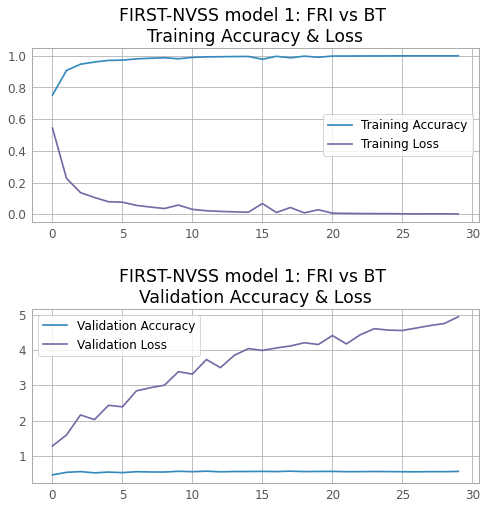

In [8]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']

loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, loss, label='Training Loss')

plt.legend(loc='best')
plt.title('FIRST-NVSS model 1: FRI vs BT \nTraining Accuracy & Loss')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='best')
plt.title('FIRST-NVSS model 1: FRI vs BT \nValidation Accuracy & Loss')
plt.show()

In [9]:
model2.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model2.summary()

history2 = model2.fit(
  train_ds2,
  validation_data=val_ds2,
  epochs=epochs
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 35, 35, 96)        11712     
                                                                 
 layer_normalization_5 (Laye  (None, 35, 35, 96)       192       
 rNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 17, 17, 96)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 17, 17, 256)       307456    
                                                                 
 layer_normalization_6 (Laye  (None, 17, 17, 256)      512       
 rNormalization)                                                 
                                                      

2022-11-24 10:15:24.262604: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 1805 of 2048
2022-11-24 10:15:25.675859: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


269/269 [==============================] - 193s 715ms/step - loss: 0.5939 - accuracy: 0.7305 - val_loss: 0.5494 - val_accuracy: 0.7332
Epoch 2/30
269/269 [==============================] - 63s 236ms/step - loss: 0.2403 - accuracy: 0.9034 - val_loss: 0.5684 - val_accuracy: 0.7542
Epoch 3/30
269/269 [==============================] - 64s 239ms/step - loss: 0.1825 - accuracy: 0.9286 - val_loss: 0.7882 - val_accuracy: 0.5853
Epoch 4/30
269/269 [==============================] - 63s 235ms/step - loss: 0.1470 - accuracy: 0.9417 - val_loss: 1.0038 - val_accuracy: 0.6481
Epoch 5/30
269/269 [==============================] - 63s 235ms/step - loss: 0.1213 - accuracy: 0.9518 - val_loss: 1.3108 - val_accuracy: 0.5204
Epoch 6/30
269/269 [==============================] - 63s 236ms/step - loss: 0.1264 - accuracy: 0.9505 - val_loss: 0.9835 - val_accuracy: 0.5384
Epoch 7/30
269/269 [==============================] - 63s 236ms/step - loss: 0.1080 - accuracy: 0.9585 - val_loss: 0.8079 - val_accuracy: 0.

In [15]:
model2.save('/home/sidius/Downloads/Saved Model data/FIRST-NVSS/M2_FRI_vs_FRII')

INFO:tensorflow:Assets written to: /home/sidius/Downloads/NVSS_Downloads/M2_FRI_vs_FRII/assets


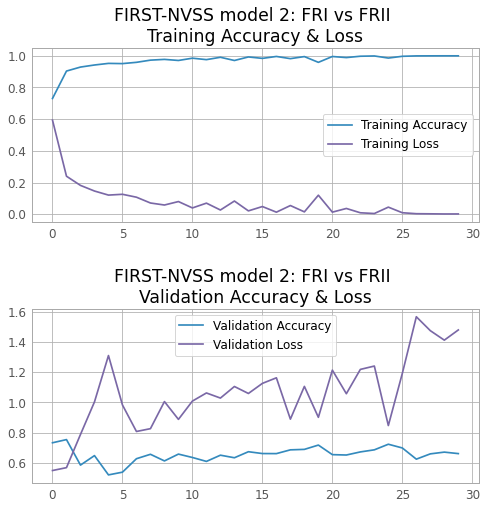

In [10]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, loss, label='Training Loss')

plt.legend(loc='best')
plt.title('FIRST-NVSS model 2: FRI vs FRII \nTraining Accuracy & Loss')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='best')
plt.title('FIRST-NVSS model 2: FRI vs FRII \nValidation Accuracy & Loss')
plt.show()

In [11]:
model3.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model3.summary()

history3 = model3.fit(
  train_ds3,
  validation_data=val_ds3,
  epochs=epochs
)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 35, 35, 96)        11712     
                                                                 
 layer_normalization_10 (Lay  (None, 35, 35, 96)       192       
 erNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 96)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 17, 17, 256)       307456    
                                                                 
 layer_normalization_11 (Lay  (None, 17, 17, 256)      512       
 erNormalization)                                                
                                                      

2022-11-24 10:51:11.437955: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 1785 of 2048
2022-11-24 10:51:12.516678: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


224/224 [==============================] - 135s 601ms/step - loss: 0.5585 - accuracy: 0.7385 - val_loss: 1.2481 - val_accuracy: 0.7786
Epoch 2/30
224/224 [==============================] - 53s 235ms/step - loss: 0.2873 - accuracy: 0.8820 - val_loss: 1.2243 - val_accuracy: 0.7995
Epoch 3/30
224/224 [==============================] - 53s 235ms/step - loss: 0.2112 - accuracy: 0.9169 - val_loss: 1.2950 - val_accuracy: 0.7679
Epoch 4/30
224/224 [==============================] - 53s 235ms/step - loss: 0.1662 - accuracy: 0.9356 - val_loss: 1.3252 - val_accuracy: 0.7250
Epoch 5/30
224/224 [==============================] - 53s 235ms/step - loss: 0.1452 - accuracy: 0.9435 - val_loss: 1.3838 - val_accuracy: 0.6944
Epoch 6/30
224/224 [==============================] - 53s 235ms/step - loss: 0.1232 - accuracy: 0.9515 - val_loss: 1.4927 - val_accuracy: 0.6318
Epoch 7/30
224/224 [==============================] - 53s 235ms/step - loss: 0.1106 - accuracy: 0.9571 - val_loss: 1.4493 - val_accuracy: 0.

In [18]:
model3.save('/home/sidius/Downloads/Saved Model data/FIRST-NVSS/M3_FRII_vs_BT')

INFO:tensorflow:Assets written to: /home/sidius/Downloads/NVSS_Downloads/M3_FRII_vs_BT/assets


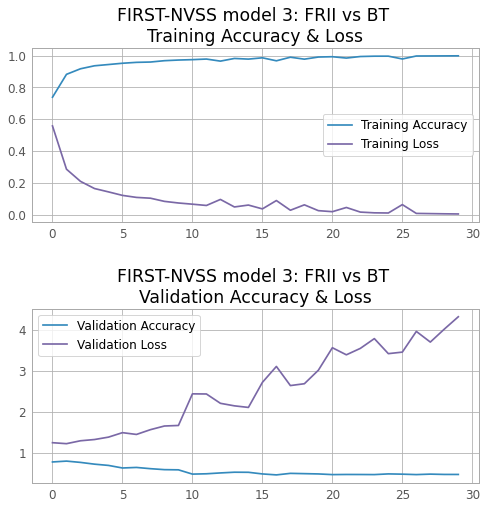

In [12]:
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']

loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, loss, label='Training Loss')

plt.legend(loc='best')
plt.title('FIRST-NVSS model 3: FRII vs BT \nTraining Accuracy & Loss')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='best')
plt.title('FIRST-NVSS model 3: FRII vs BT \nValidation Accuracy & Loss')
plt.show()

# Voting system

In [5]:
model1 = keras.models.load_model('/home/sidius/Saved Model data/FIRST-NVSS/M1_FRI_vs_BT')
model2 = keras.models.load_model('/home/sidius/Saved Model data/FIRST-NVSS/M2_FRI_vs_FRII')
model3 = keras.models.load_model('/home/sidius/Saved Model data/FIRST-NVSS/M3_FRII_vs_BT')


In [6]:
basepath = 'ImagesTEST/Test Images/BT'

for entry in os.listdir(basepath):
    if os.path.isfile(os.path.join(basepath, entry)):
        fits2jpgVal(entry,basepath,'ImagesTEST/png_Versions/ImagesForTest/BT',2)
        
        
basepath = 'ImagesTEST/Test Images/FRI'

for entry in os.listdir(basepath):
    if os.path.isfile(os.path.join(basepath, entry)):
        fits2jpgVal(entry,basepath,'ImagesTEST/png_Versions/ImagesForTest/FRI',2)


basepath = 'ImagesTEST/Test Images/FRII'

for entry in os.listdir(basepath):
    if os.path.isfile(os.path.join(basepath, entry)):
        fits2jpgVal(entry,basepath,'ImagesTEST/png_Versions/ImagesForTest/FRII',2)

Lossy conversion from >f4 to uint8. Range [0.0, 0.005247144494205713]. Convert image to uint8 prior to saving to suppress this warning.


<astropy.nddata.utils.Cutout2D object at 0x7f3d7410c220> 0.0004696338000940159
<astropy.nddata.utils.Cutout2D object at 0x7f3d7413d310> 0.00044111341412644833


Lossy conversion from >f4 to uint8. Range [0.0, 0.0069246431812644005]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from >f4 to uint8. Range [0.0, 0.030786916613578796]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from >f4 to uint8. Range [0.0, 0.022086622193455696]. Convert image to uint8 prior to saving to suppress this warning.


<astropy.nddata.utils.Cutout2D object at 0x7f3d741b7f40> 0.00035659783316077664
<astropy.nddata.utils.Cutout2D object at 0x7f3d741b7460> 0.0006131420232122764


Lossy conversion from >f4 to uint8. Range [0.0, 0.004670270252972841]. Convert image to uint8 prior to saving to suppress this warning.


<astropy.nddata.utils.Cutout2D object at 0x7f3d741b7ac0> 0.00044000342313665897
<astropy.nddata.utils.Cutout2D object at 0x7f3d741b76a0> 0.0004946195113006979


Lossy conversion from >f4 to uint8. Range [0.0, 0.0071570985019207]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from >f4 to uint8. Range [0.0, 0.8789464235305786]. Convert image to uint8 prior to saving to suppress this warning.


<astropy.nddata.utils.Cutout2D object at 0x7f3d741b7070> 0.0006301437970250845
<astropy.nddata.utils.Cutout2D object at 0x7f3e43c242b0> 0.0007345872872974724


Lossy conversion from >f4 to uint8. Range [0.0, 1.2545576095581055]. Convert image to uint8 prior to saving to suppress this warning.


In [20]:
FR1_Score = 0
FR2_Score = 0
BT_Score = 0

# untrained_image_path = pathlib.Path('ImagesTEST/png_Versions/ImagesForTest/BT/J153616.2+142045B0.png')
# untrained_image_path = pathlib.Path('ImagesTEST/png_Versions/ImagesForTest/BT/J154549.4-024954B0.png')
# untrained_image_path = pathlib.Path('ImagesTEST/png_Versions/ImagesForTest/BT/J160318.6+192414B0.png')

# untrained_image_path = pathlib.Path('ImagesTEST/png_Versions/ImagesForTest/FRI/J153932.09+013710.5B0.png')
# untrained_image_path = pathlib.Path('ImagesTEST/png_Versions/ImagesForTest/FRI/J155222.36+223311.9B0.png')
untrained_image_path = pathlib.Path('ImagesTEST/png_Versions/ImagesForTest/FRI/J155721.38+544015.9B0.png')

# untrained_image_path = pathlib.Path('ImagesTEST/png_Versions/ImagesForTest/FRII/3C194B0.png')
# untrained_image_path = pathlib.Path('ImagesTEST/png_Versions/ImagesForTest/FRII/3C228B0.png')
img = tf.keras.utils.load_img(
    untrained_image_path, target_size=(img_height, img_width),color_mode="grayscale"
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch



predictions2 = model2(img_array,training=False)
# score2 = tf.nn.softmax(predictions2[0])
FR1_Score += float(predictions2[0][0])
FR2_Score += float(predictions2[0][1])

print(predictions2[0])
# print(score2)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions3 = model3(img_array,training=False)
# score3 = tf.nn.softmax(predictions3[0])
BT_Score += float(predictions3[0][0])
FR2_Score += float(predictions3[0][1])

print(predictions3[0])
# print(score3)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions1 = model1(img_array,training=False)
# score1 = tf.nn.softmax(predictions1[0])
BT_Score += float(predictions1[0][0])
FR1_Score += float(predictions1[0][1])

print(predictions1)
# print(score1)

BT_Score = 0.5*BT_Score
FR1_Score = 0.5*FR1_Score
FR2_Score = 0.5*FR2_Score

Fusion = [[BT_Score,FR1_Score,FR2_Score],['Bent_Tail','FRI','FRII']]
vote = 0
print(np.argmax(Fusion[0]))

# if(np.argmax(Fusion[0]) == 0):
#     vote = 1
# if(np.argmax(Fusion[0]) == 1):
#     vote = 2
# if(np.argmax(Fusion[0]) == 2):
#     vote = 3


print(BT_Score,FR1_Score,FR2_Score)


print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(Fusion[1][np.argmax(Fusion[0])], 100 * np.max(Fusion[0]))
)

# untrained_image_path = pathlib.Path('/home/sidius/Downloads/Images/fits_png/J093058.74+034827.7.png')
# img = tf.keras.utils.load_img(
#     untrained_image_path, target_size=(img_height, img_width),color_mode="grayscale"
# )
# img_array = tf.keras.utils.img_to_array(img)
# img_array = tf.expand_dims(img_array, 0) # Create a batch

# predictions = model.predict(img_array)
# score = tf.nn.softmax(predictions[0])

# print(
#     "This image most likely belongs to {} with a {:.2f} percent confidence."
#     .format(class_names[np.argmax(score)], 100 * np.max(score))
# )

tf.Tensor([0.2830552  0.71694475], shape=(2,), dtype=float32)
tf.Tensor([2.2330858e-04 9.9977666e-01], shape=(2,), dtype=float32)
tf.Tensor([[6.3486409e-04 9.9936515e-01]], shape=(1, 2), dtype=float32)
2
0.0004290863362257369 0.6412101686000824 0.8583607077598572
This image most likely belongs to FRII with a 85.84 percent confidence.
